In [43]:
BHIDs = np.unique(df['BHID'])

In [107]:
df.loc[df['BHID'] == BHIDs[2]]

,BHID,BHID_NAME,Deposit,FROM,TO,LENGTH,WKern,WKernProc,ST_CODE,ST_CODE_sys,ST_CODE_otd,ST_CODE_svit,LIT_CODE,ROCK,Angle,OPISANIE
310,752,752,Норильск-1.Южная часть,0.00,13.20,13.20,13.20,100.00,Q,Q,NaN,NaN,SUGL,суглинок,0,"Наносы,под почвенным слоем залегает суглинок с..."
311,752,752,Норильск-1.Южная часть,13.20,20.00,6.80,4.77,70.15,T1nd,T,T1,T1nd,BAZ-PF,базальт плагиофировый,0,"С порфировой структурой,в начале потока-чередо..."
312,752,752,Норильск-1.Южная часть,20.00,22.10,2.10,1.43,68.10,T1nd,T,T1,T1nd,TUF,туф,0,"Обломочный материал спаян пеплом и стеклом,вст..."
313,752,752,Норильск-1.Южная часть,22.10,26.70,4.60,2.72,59.13,T1tk,T,T1,T1tk,BAZ-PF,базальт плагиофировый,0,"Тонкозернистый,с редкими вкрапленниками плагио..."
314,752,752,Норильск-1.Южная часть,26.70,29.70,3.00,2.56,85.33,T1nd,T,T1,T1nd,TUF,туф,0,"Землистая,встречаются крупные миндалины с цеол..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,752,752,Норильск-1.Южная часть,853.00,857.70,4.70,3.30,70.21,T1nr-nr,T,T1,T1nr-nr,G-T,габбро-долерит такситовый,0,"Мезократовый,структура однородная,рудые вкрапл..."
414,752,752,Норильск-1.Южная часть,857.70,859.00,1.30,1.10,84.62,T1nr-nr,T,T1,T1nr-nr,G-K,габбро-долерит контактовый,0,"Вкрапленников рудных минералов мало,они мелки,..."
415,752,752,Норильск-1.Южная часть,859.00,868.10,9.10,3.05,33.52,T1nr-nr,T,T1,T1nr-nr,L-TA,долерит титан-авгитовый,0,С крупными пластинчатыми вкрапленниками прагио...
416,752,752,Норильск-1.Южная часть,868.10,869.25,1.15,0.40,34.78,T1nr-nr,T,T1,T1nr-nr,L-TA,долерит титан-авгитовый,0,Долерит титан-авгитовый серый


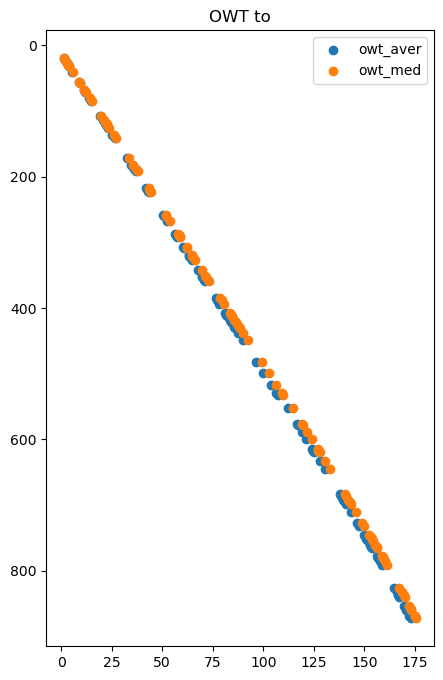

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Alina\Desktop\000 - Материалы от заказчика\2024.01.29 Petrel Template Data\Well Tops.csv", sep=";", encoding = 'cp1251')
vel_df = pd.read_csv(r"C:\Users\Alina\Desktop\040 - Обработка\Псевдочекшоты\velocity.csv", sep=";")

BHIDs = np.unique(df['BHID'])
#df.loc[df['BHID'] == BHIDs[20]]




for bhid in BHIDs[2:3]:
    
    temp_df = df[df['BHID'] == bhid]
    merged_df = temp_df.merge(vel_df, left_on='ST_CODE_svit', right_on='ST_CODE_svit',
#                               validate='one_to_many',
                             )

    merged_df.sort_values(by=['TO'],  inplace=True) 
#     df.loc[df['BHID'] == bhid, 'Vaver'] = merged_df['Vaver']
   
    
    
    t_med =  (merged_df['TO'] - merged_df['FROM']) * 1000 / merged_df['Vaver']
    t_aver = (merged_df['TO'] - merged_df['FROM']) * 1000 / merged_df['Vmed']

    
    
    
    merged_df['owt_aver'] = t_aver.cumsum()
    merged_df['owt_med'] = t_med.cumsum()
    
    merged_df = pd.concat([pd.DataFrame([[0, 0]], columns=['TO', 'OWT']), merged_df])


    
    

    fig, ax = plt.subplots(figsize=(5, 8))
    ax.scatter(merged_df['owt_aver'], merged_df['TO'], label='owt_aver')
    ax.scatter(merged_df['owt_med'], merged_df['TO'], label='owt_med') 
    #ax.label()
    ax.set_title('OWT to')
    ax.legend()
    ax.invert_yaxis()
    plt.show()
    

In [155]:
merged_df

,TO,OWT,BHID,BHID_NAME,Deposit,FROM,LENGTH,WKern,WKernProc,ST_CODE,...,ST_CODE_otd,ST_CODE_svit,LIT_CODE,ROCK,Angle,OPISANIE,Vaver,Vmed,owt_aver,owt_med
0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,20.00,NaN,752,752,Норильск-1.Южная часть,13.20,6.80,4.77,70.15,T1nd,...,T1,T1nd,BAZ-PF,базальт плагиофировый,0.0,"С порфировой структурой,в начале потока-чередо...",4717.142857,4850.0,1.402062,1.441551
1,22.10,NaN,752,752,Норильск-1.Южная часть,20.00,2.10,1.43,68.10,T1nd,...,T1,T1nd,TUF,туф,0.0,"Обломочный материал спаян пеплом и стеклом,вст...",4717.142857,4850.0,1.835052,1.886735
58,26.70,NaN,752,752,Норильск-1.Южная часть,22.10,4.60,2.72,59.13,T1tk,...,T1,T1tk,BAZ-PF,базальт плагиофировый,0.0,"Тонкозернистый,с редкими вкрапленниками плагио...",4860.000000,4860.0,2.781554,2.833237
2,29.70,NaN,752,752,Норильск-1.Южная часть,26.70,3.00,2.56,85.33,T1nd,...,T1,T1nd,TUF,туф,0.0,"Землистая,встречаются крупные миндалины с цеол...",4717.142857,4850.0,3.400110,3.469216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,857.70,NaN,752,752,Норильск-1.Южная часть,853.00,4.70,3.30,70.21,T1nr-nr,...,T1,T1nr-nr,G-T,габбро-долерит такситовый,0.0,"Мезократовый,структура однородная,рудые вкрапл...",5625.384615,5700.0,170.433699,173.110638
75,859.00,NaN,752,752,Норильск-1.Южная часть,857.70,1.30,1.10,84.62,T1nr-nr,...,T1,T1nr-nr,G-K,габбро-долерит контактовый,0.0,"Вкрапленников рудных минералов мало,они мелки,...",5625.384615,5700.0,170.661769,173.341734
76,868.10,NaN,752,752,Норильск-1.Южная часть,859.00,9.10,3.05,33.52,T1nr-nr,...,T1,T1nr-nr,L-TA,долерит титан-авгитовый,0.0,С крупными пластинчатыми вкрапленниками прагио...,5625.384615,5700.0,172.258260,174.959401
77,869.25,NaN,752,752,Норильск-1.Южная часть,868.10,1.15,0.40,34.78,T1nr-nr,...,T1,T1nr-nr,L-TA,долерит титан-авгитовый,0.0,Долерит титан-авгитовый серый,5625.384615,5700.0,172.460014,175.163831


C:\Users\Alina\AppData\Local\Temp\ipykernel_4724\1243039786.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 8))


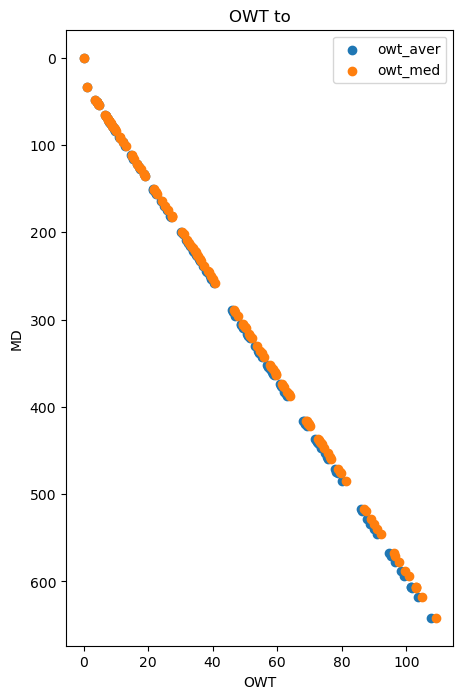

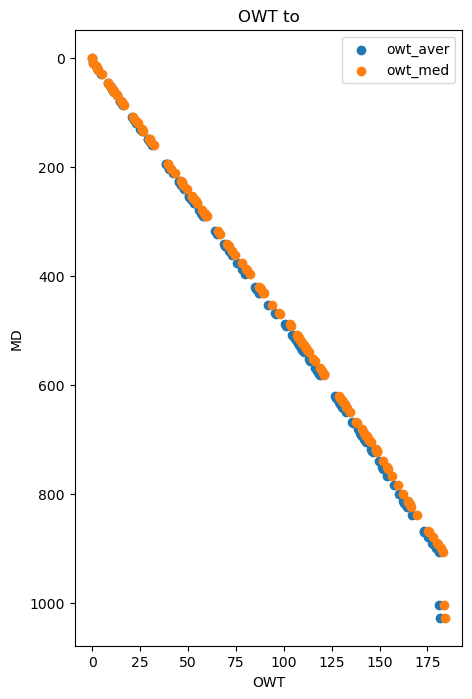

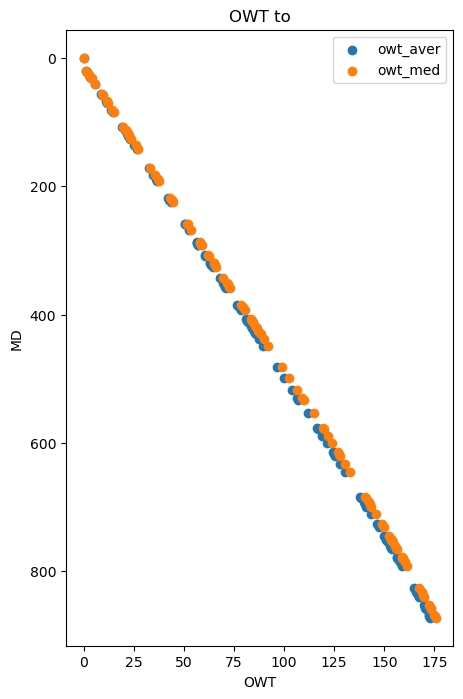

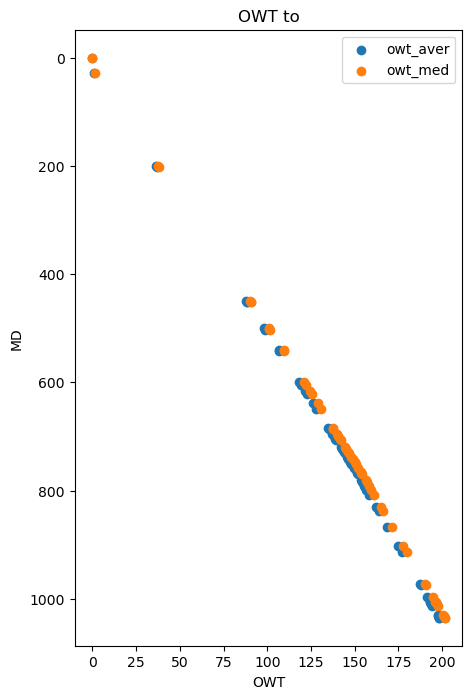

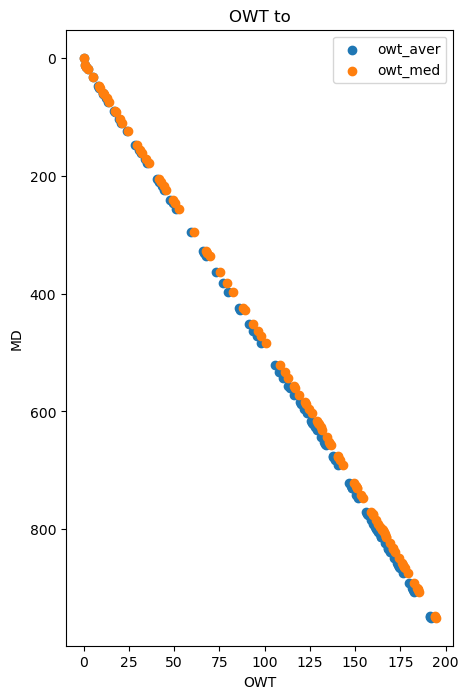

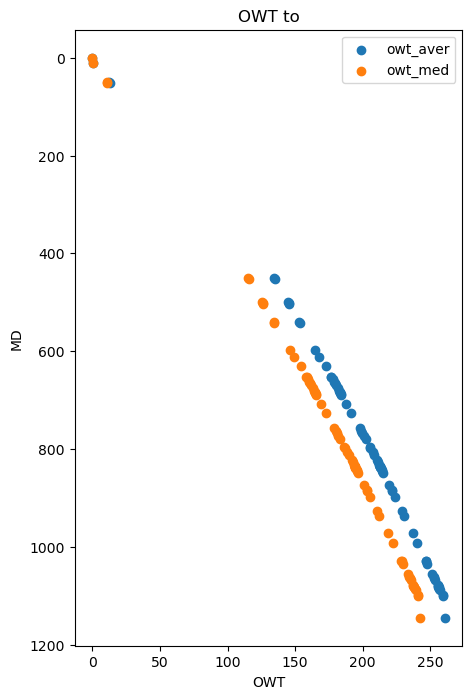

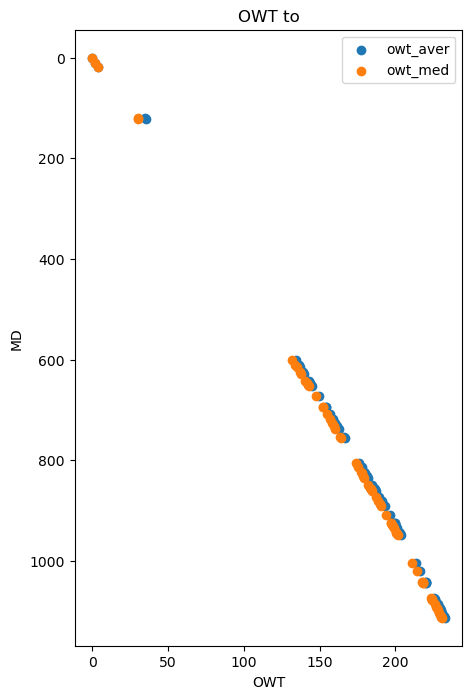

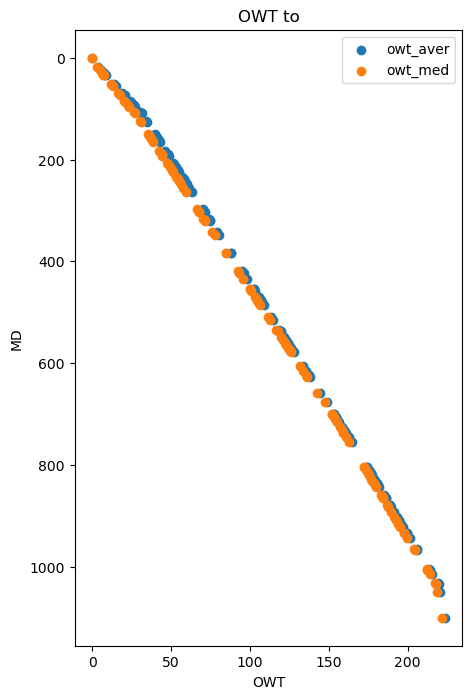

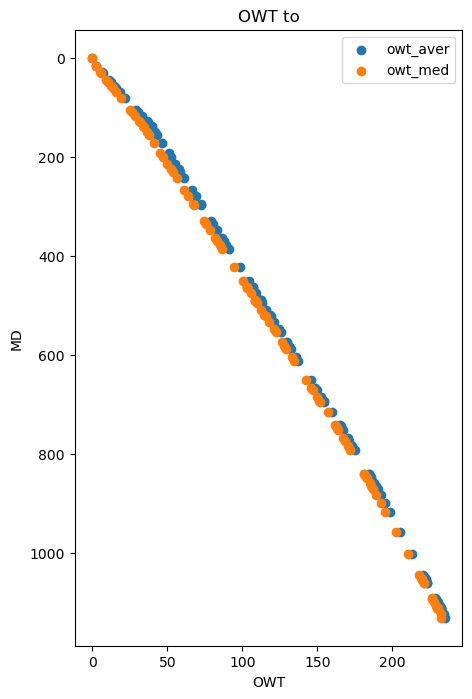

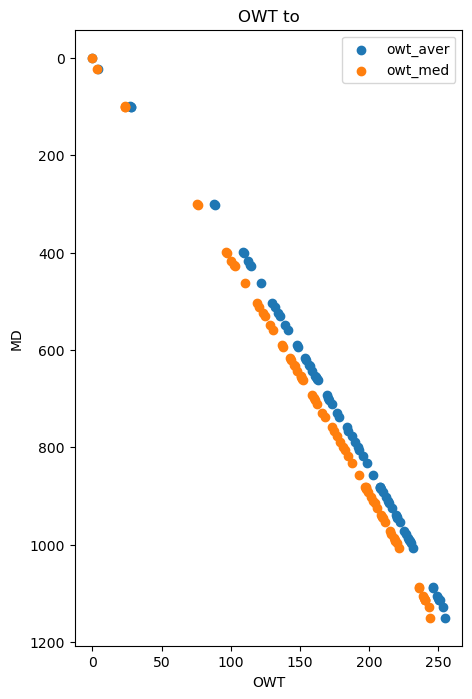

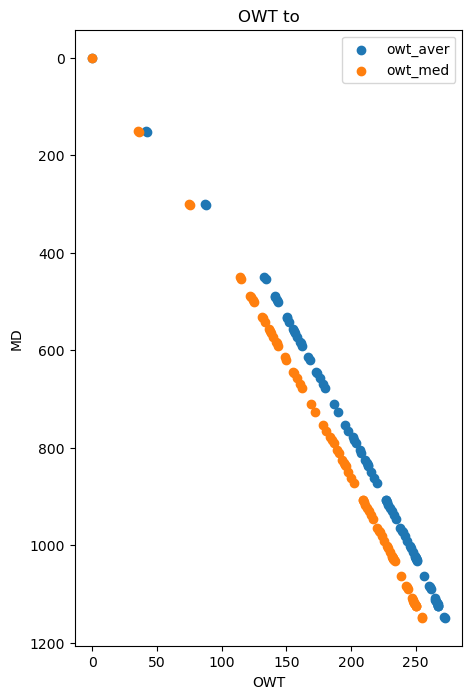

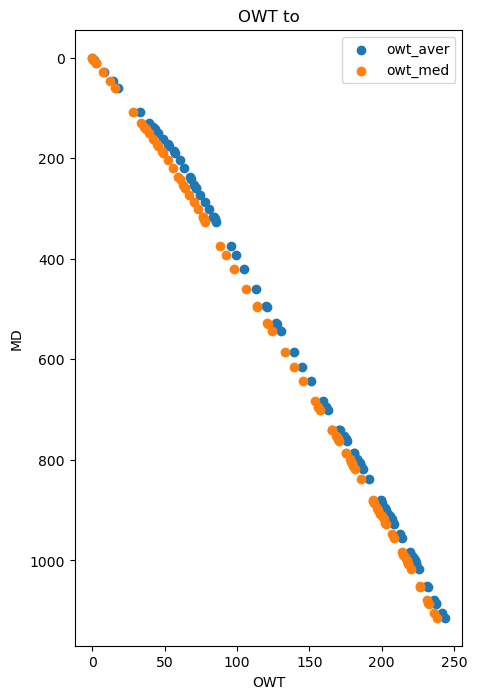

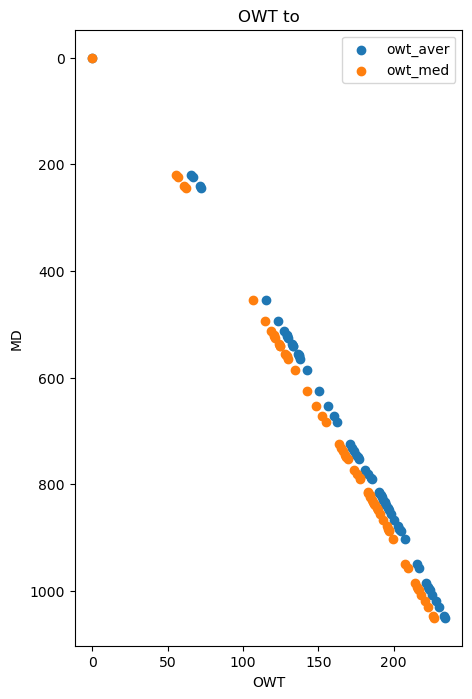

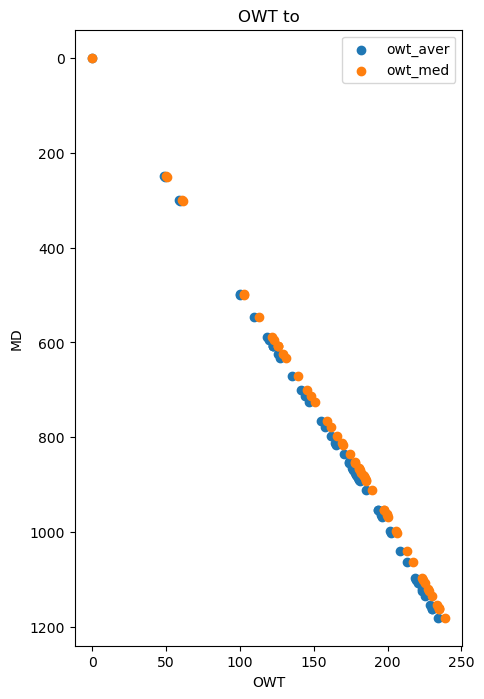

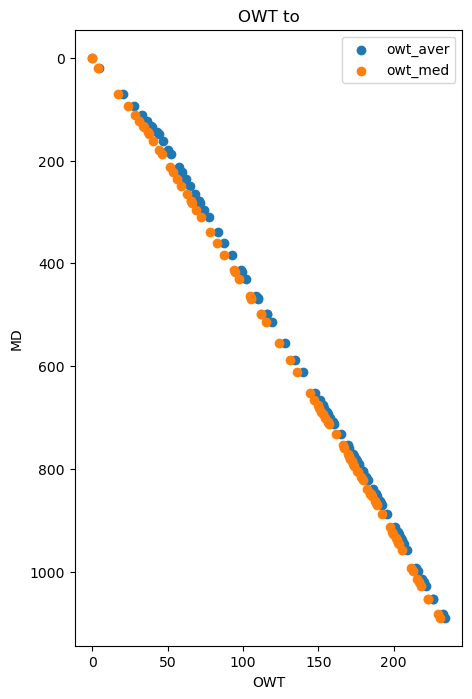

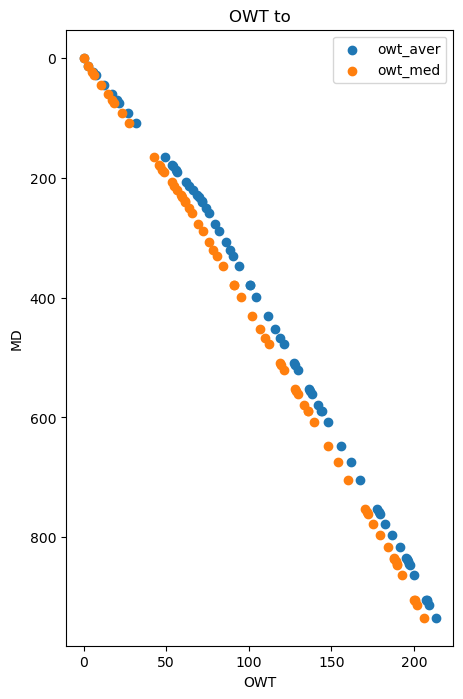

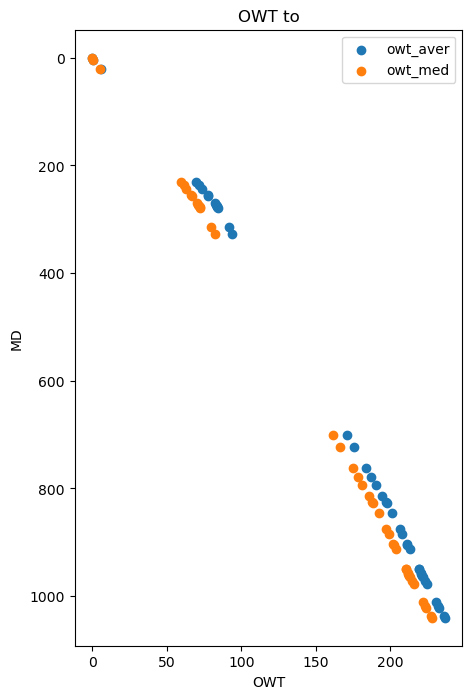

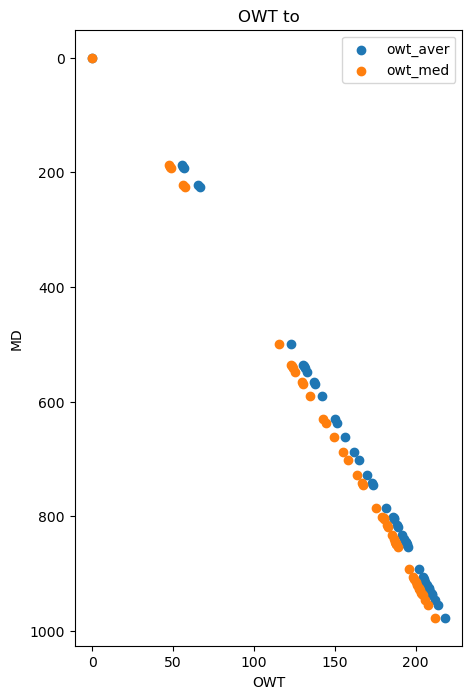

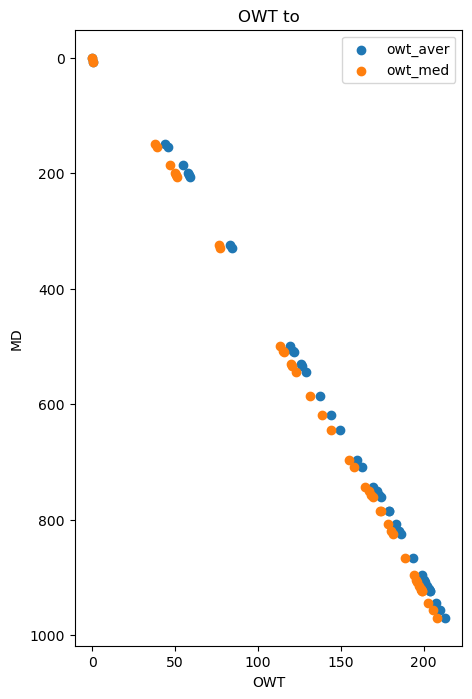

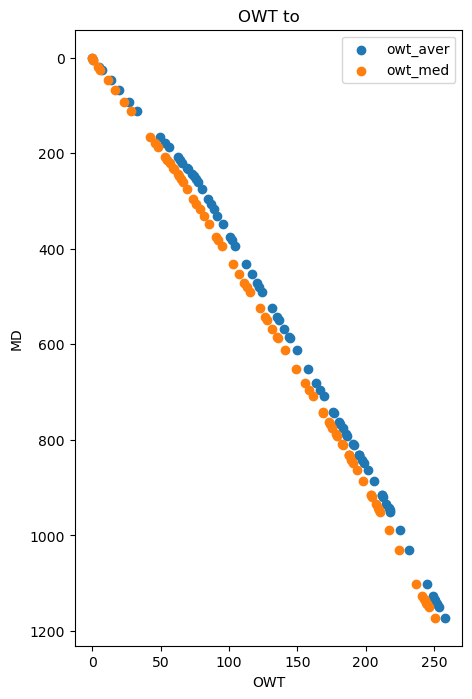

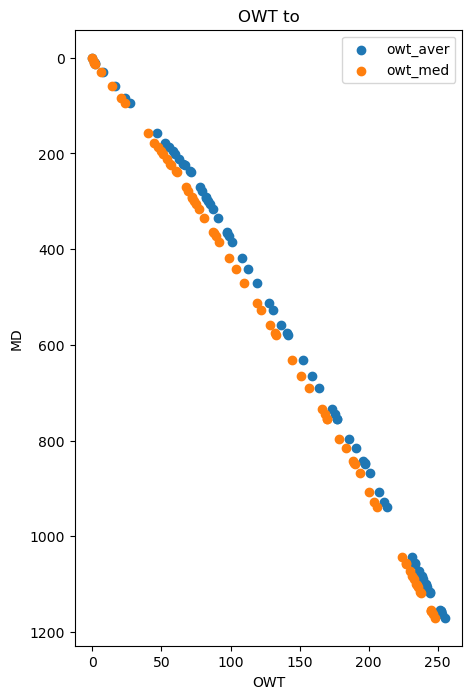

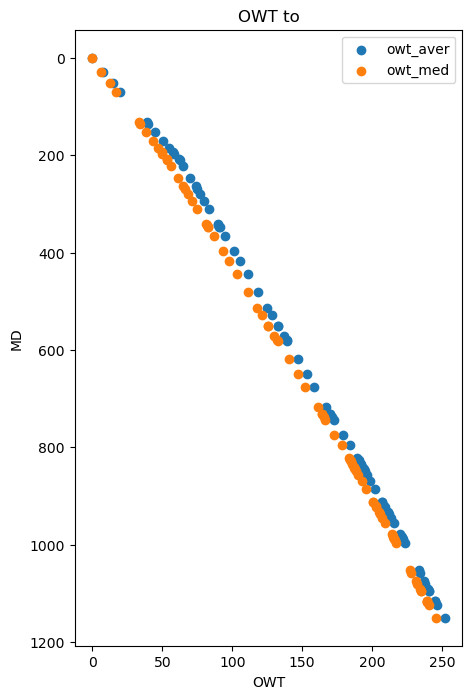

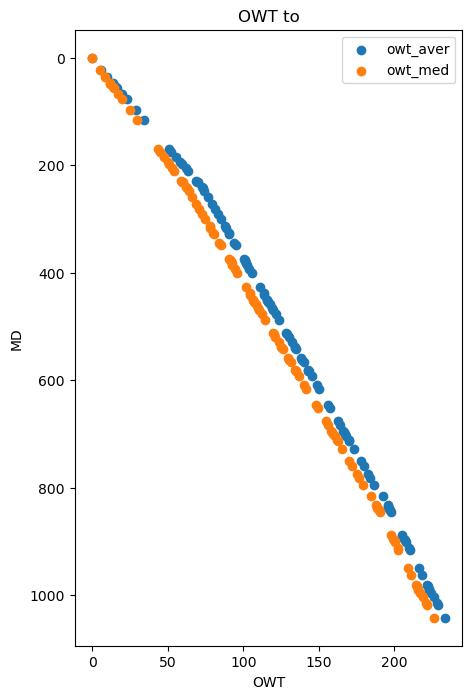

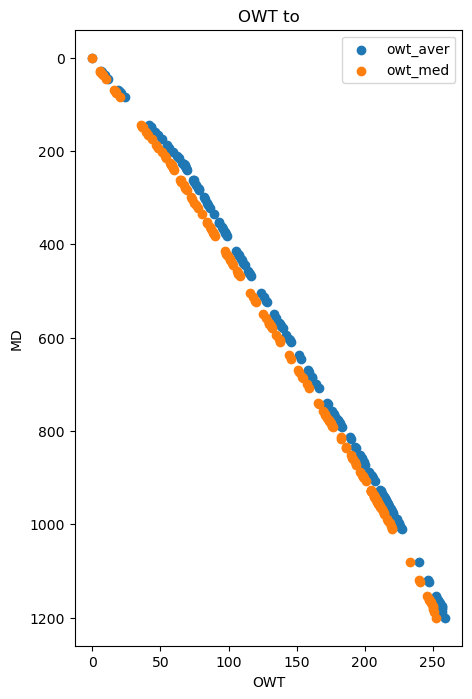

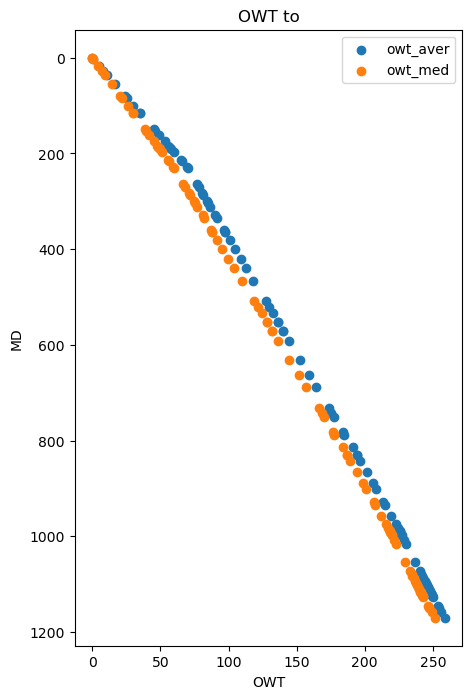

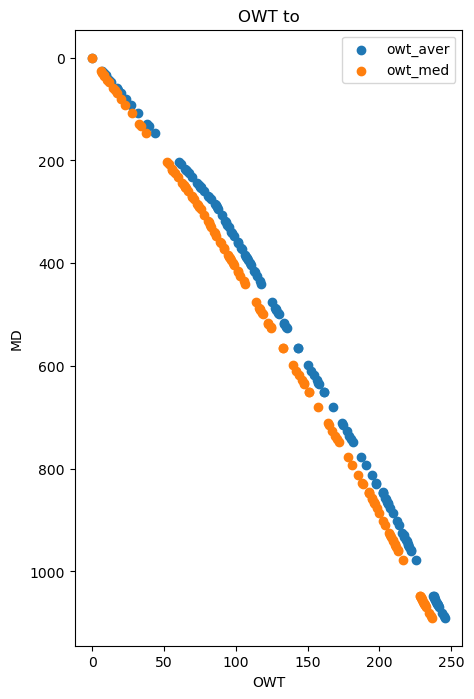

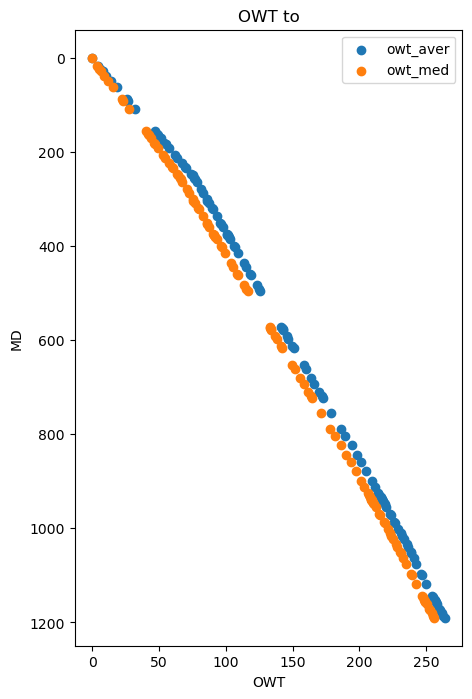

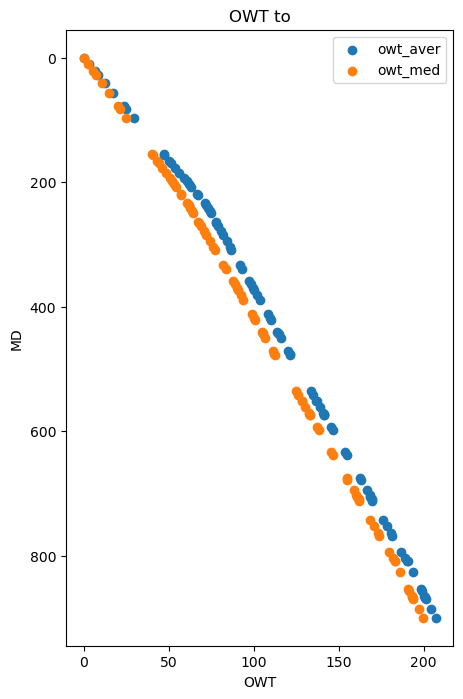

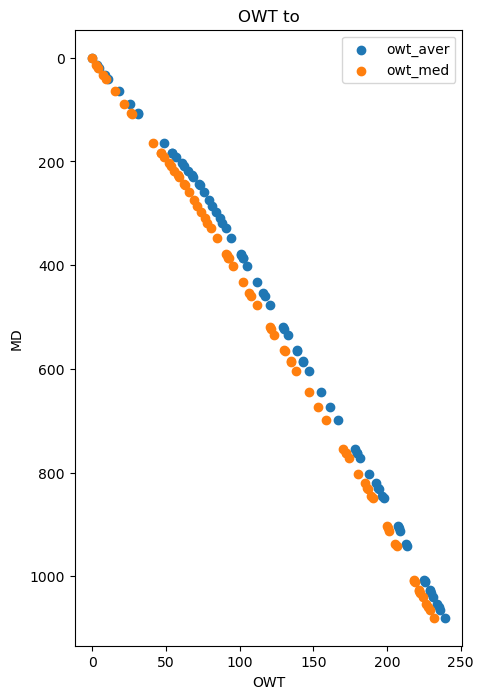

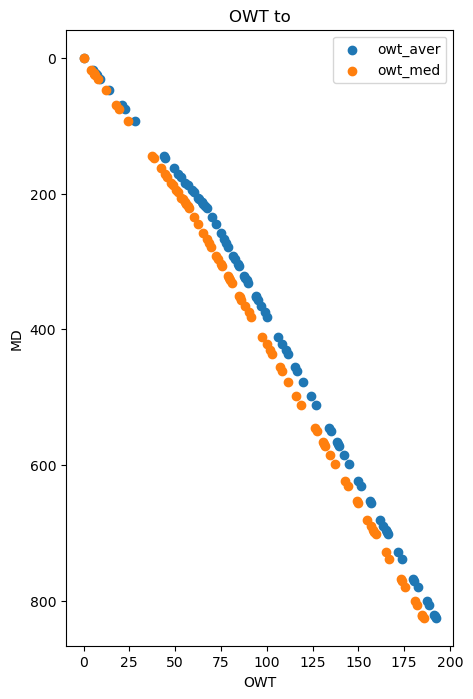

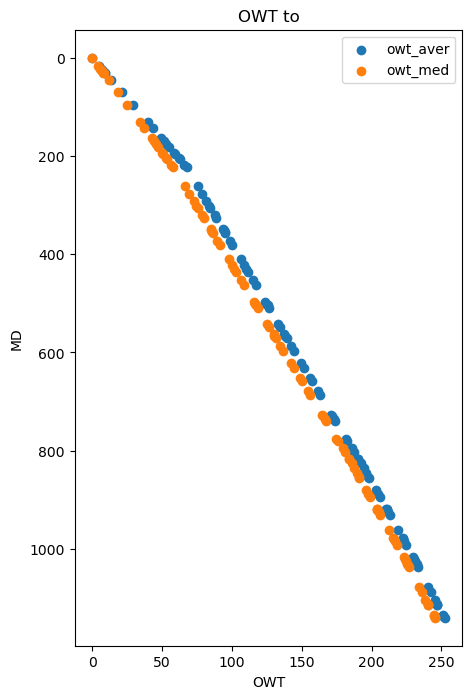

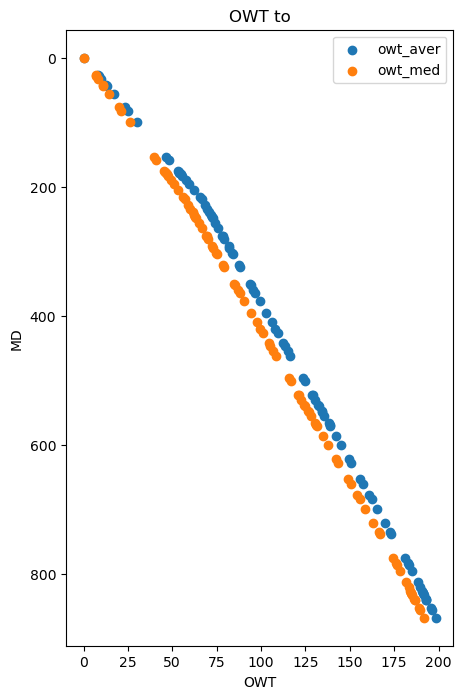

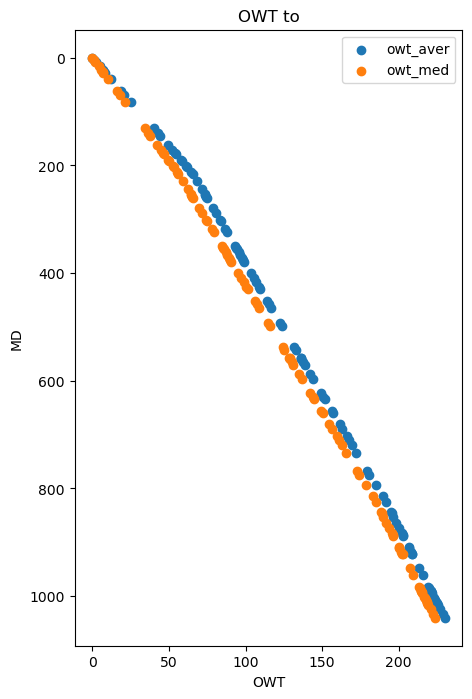

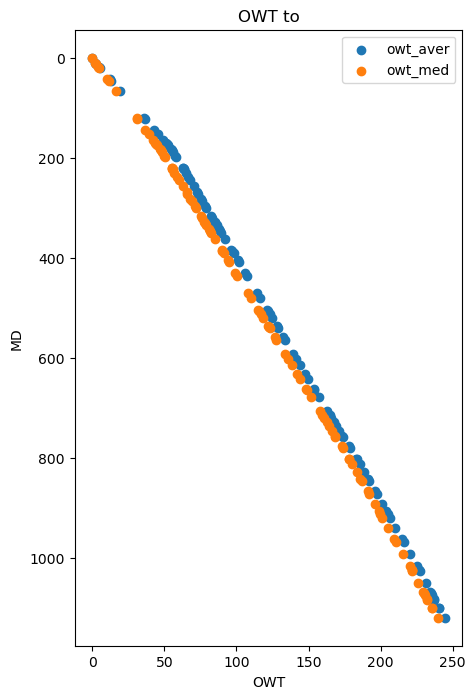

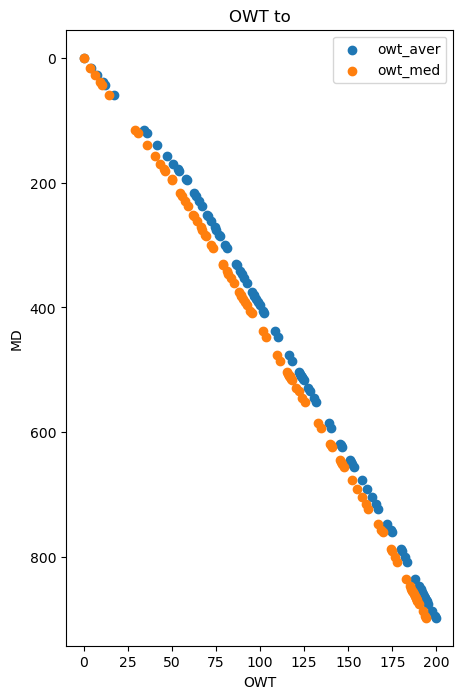

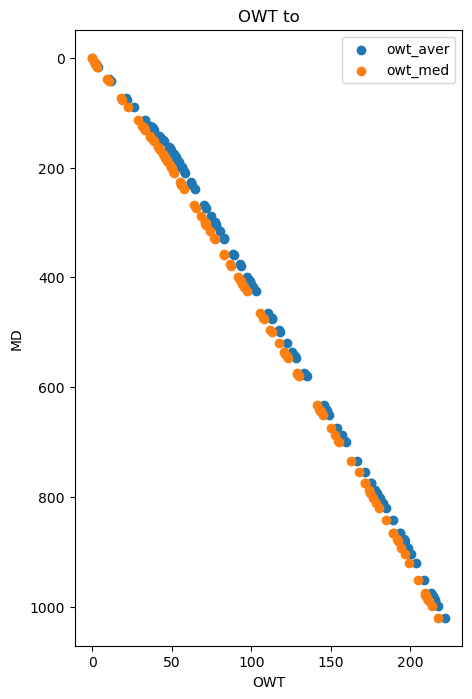

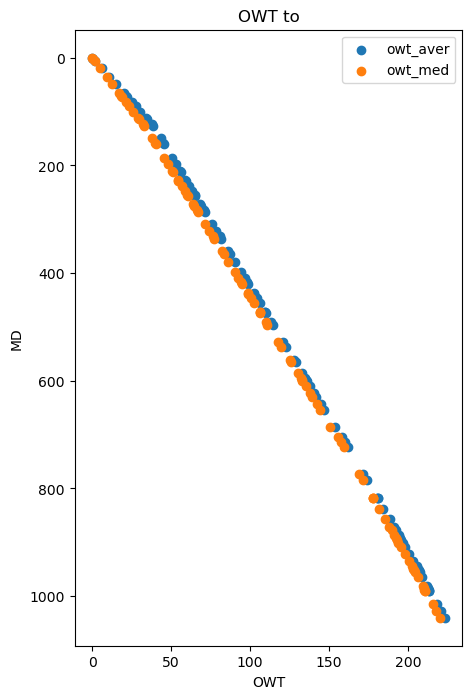

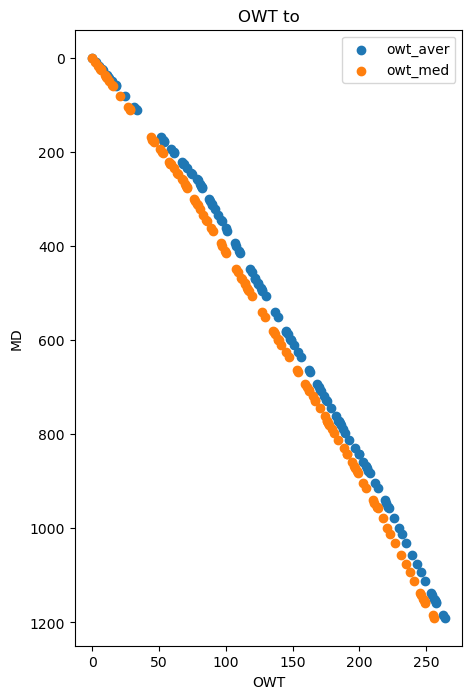

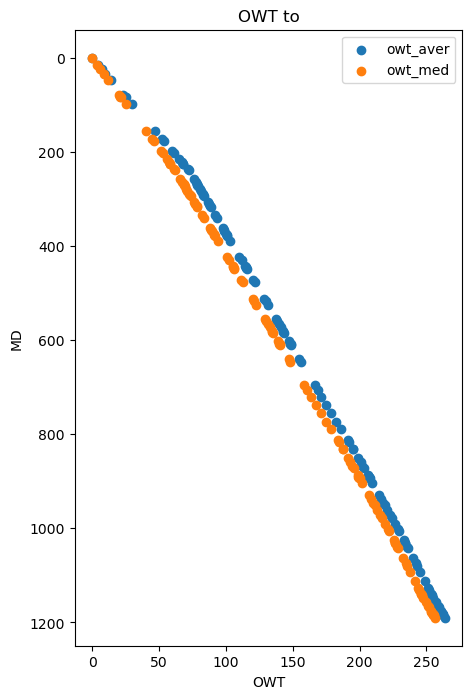

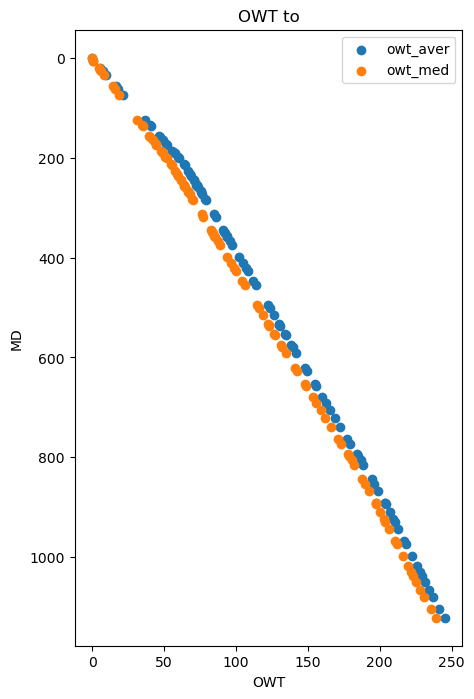

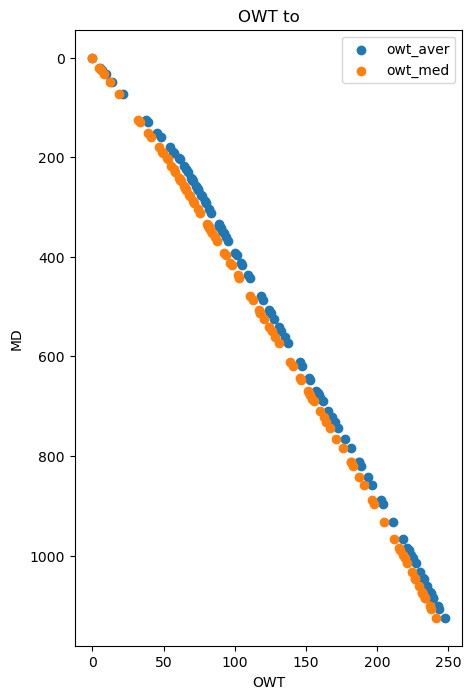

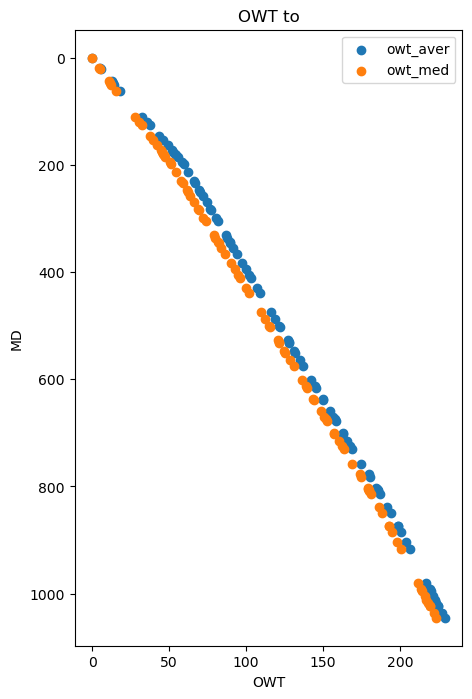

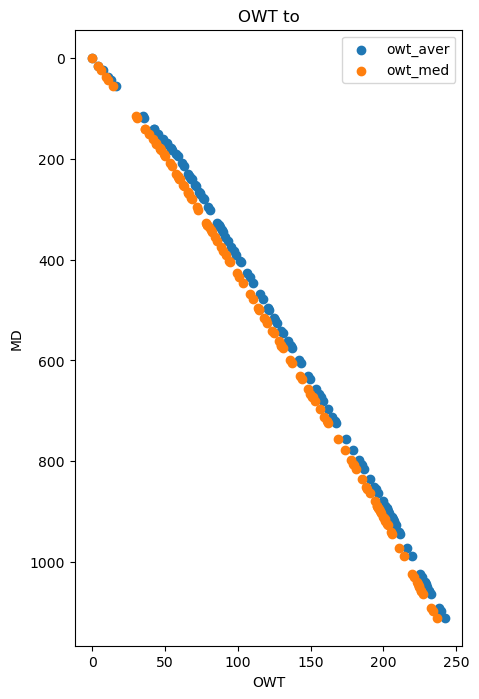

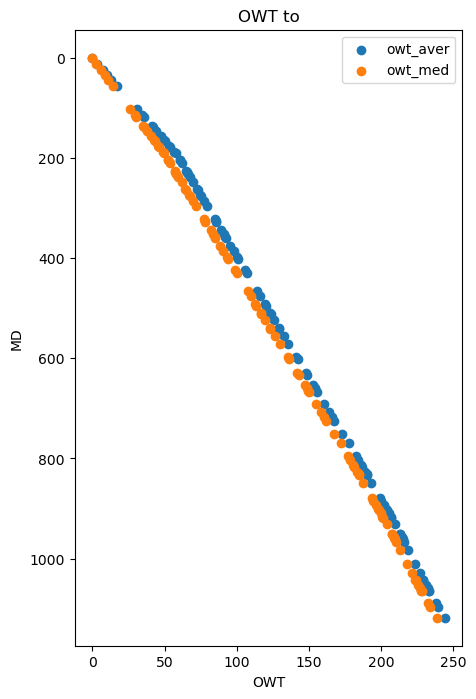

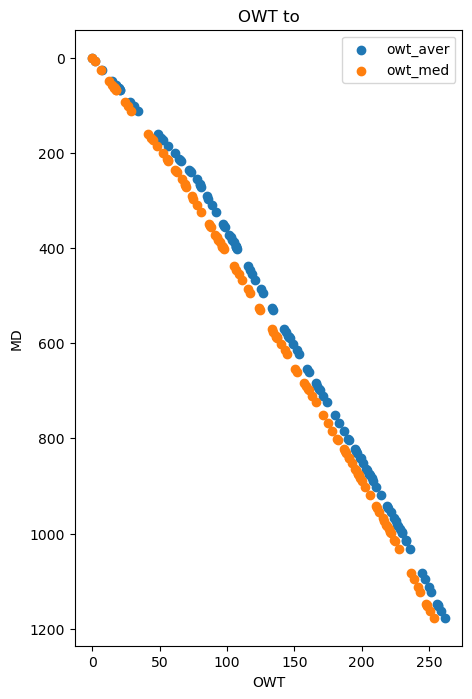

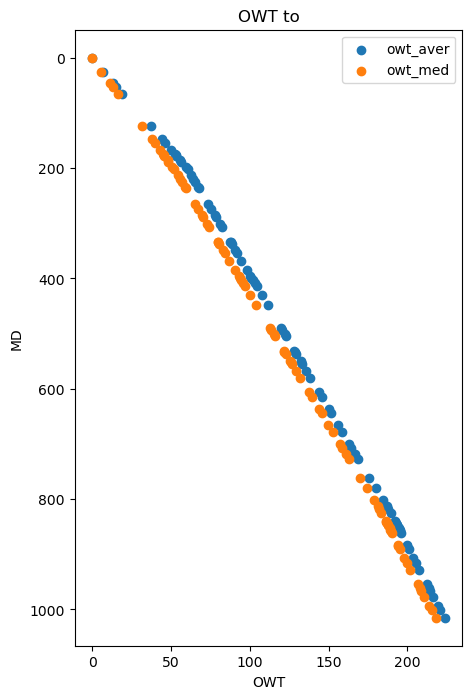

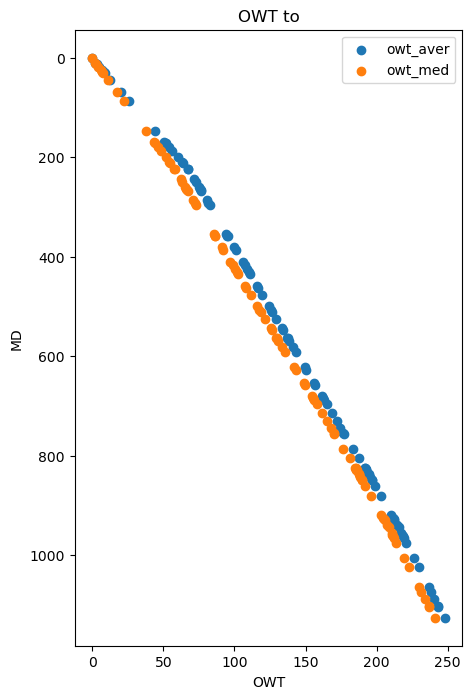

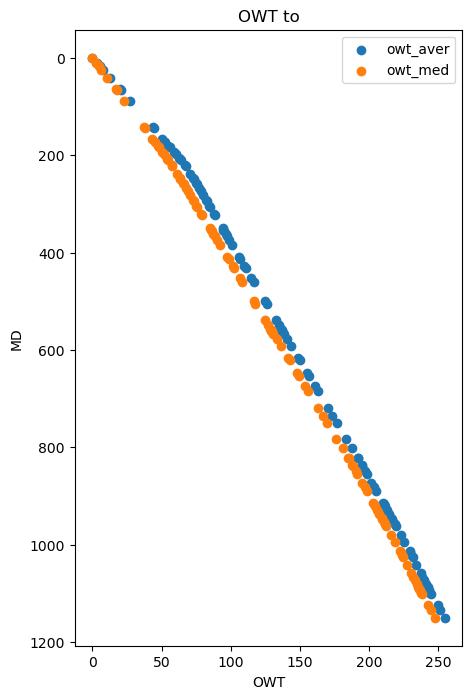

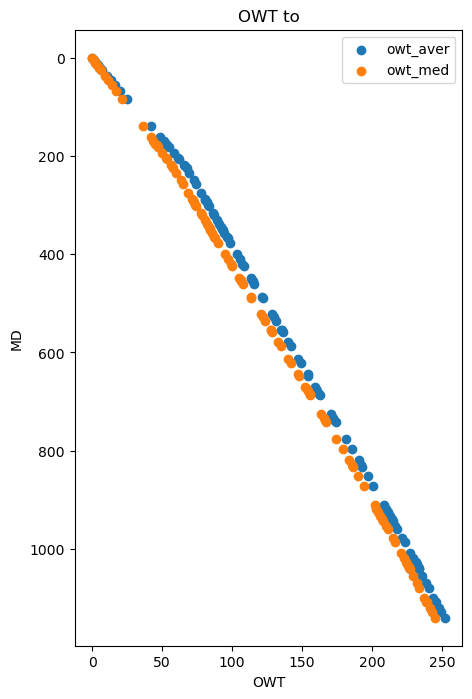

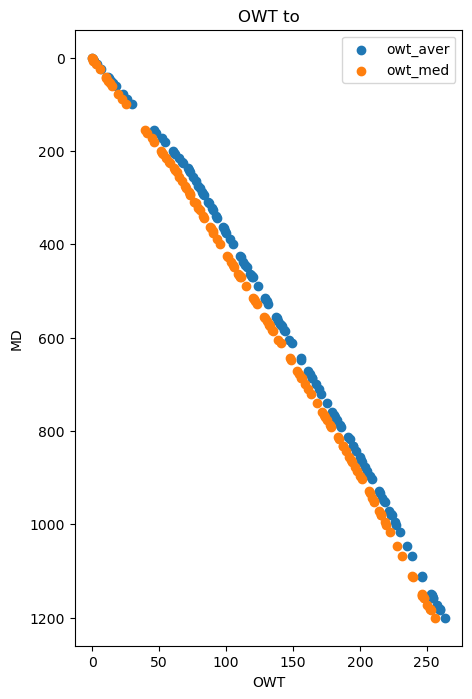

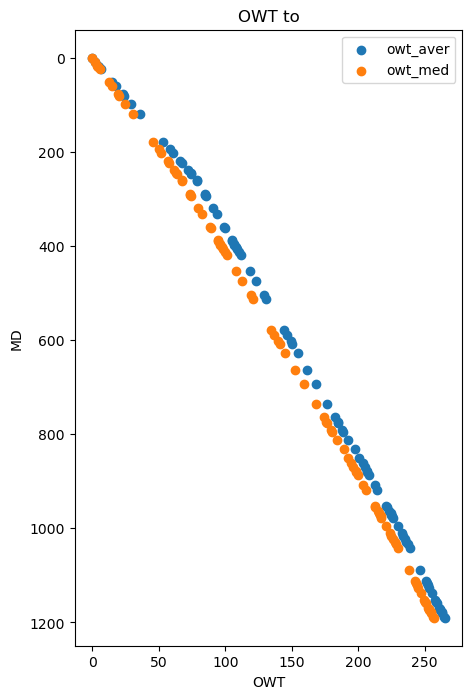

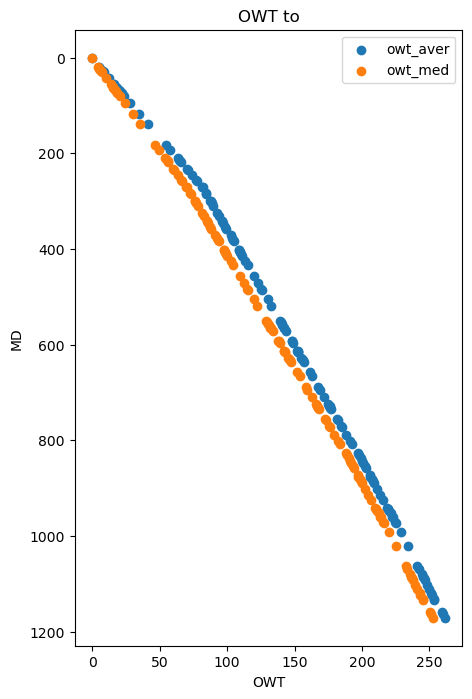

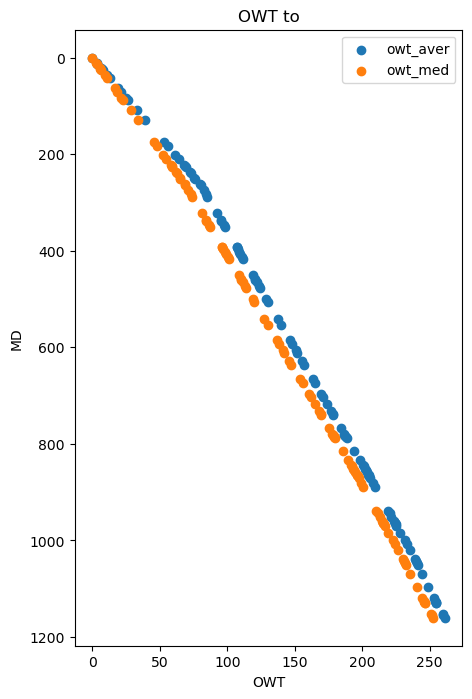

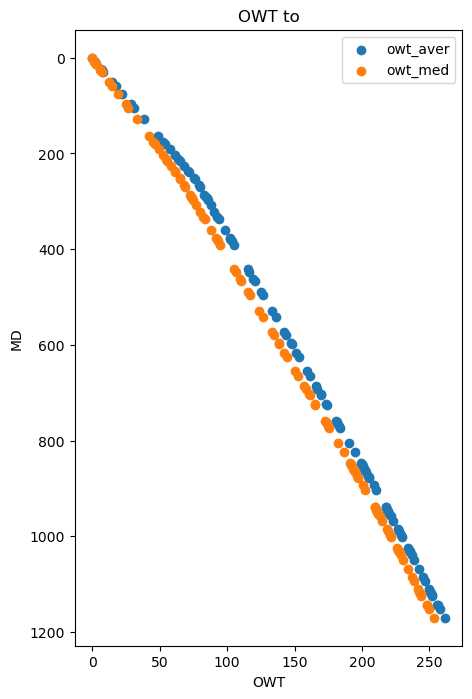

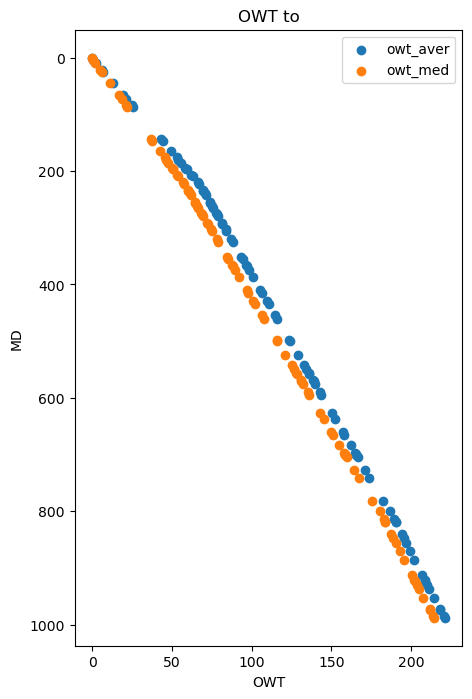

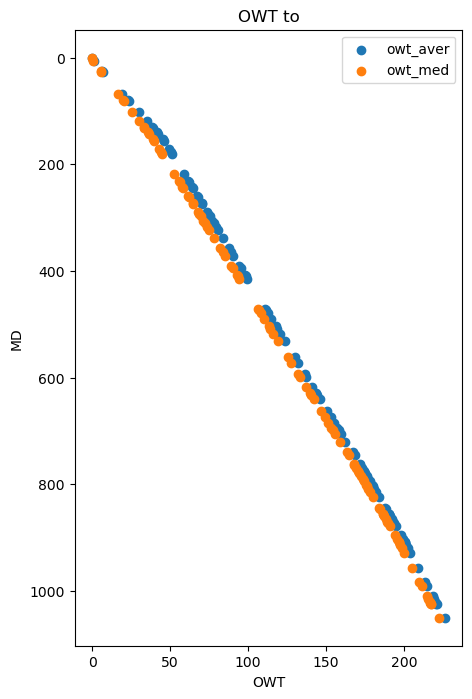

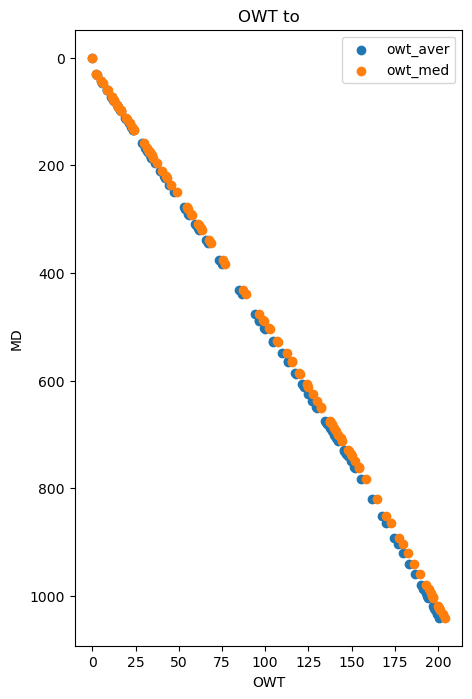

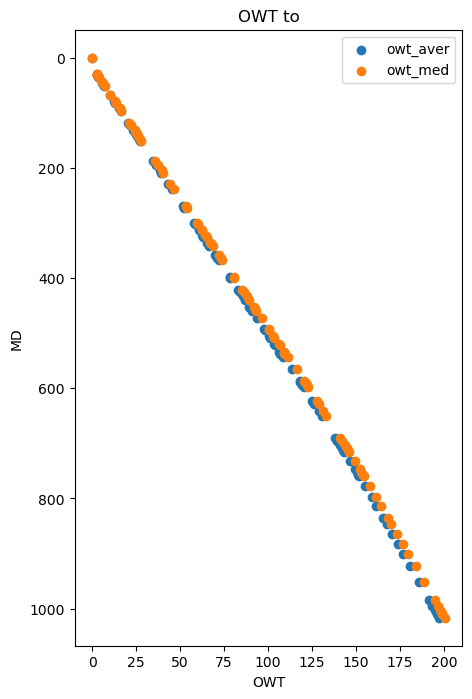

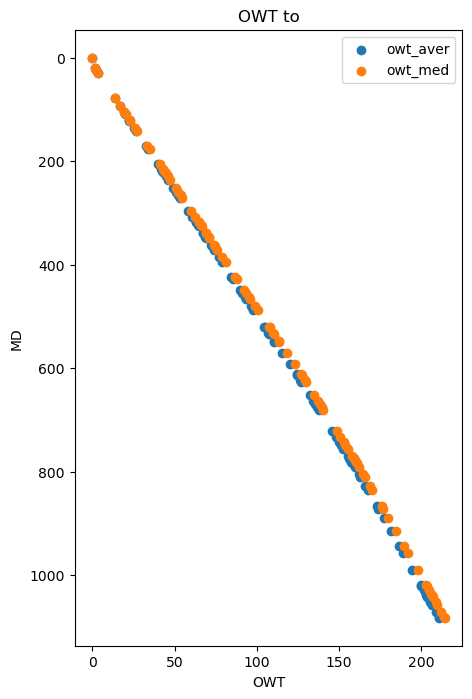

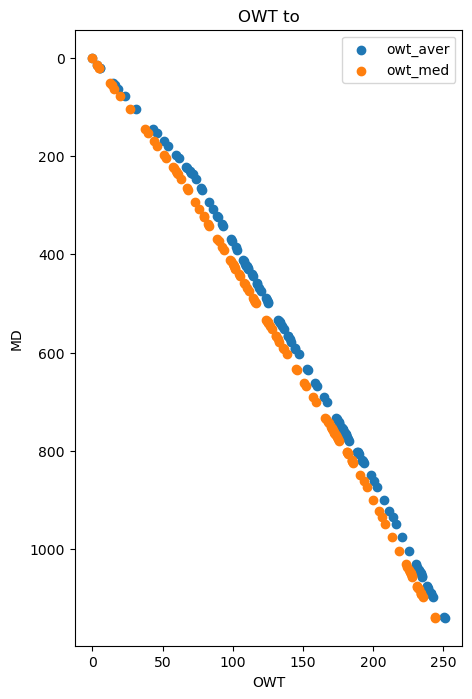

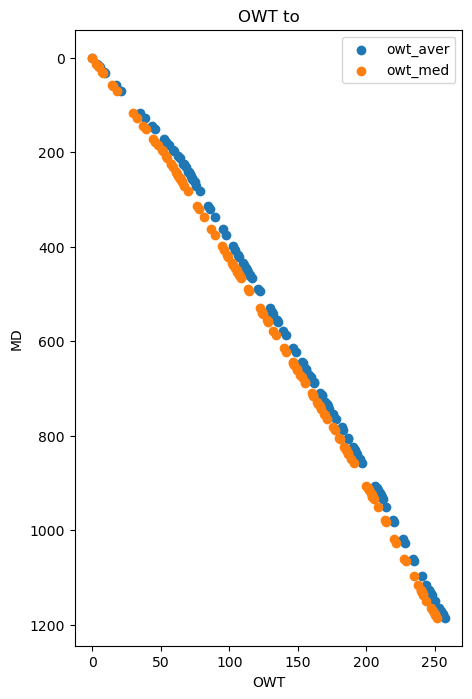

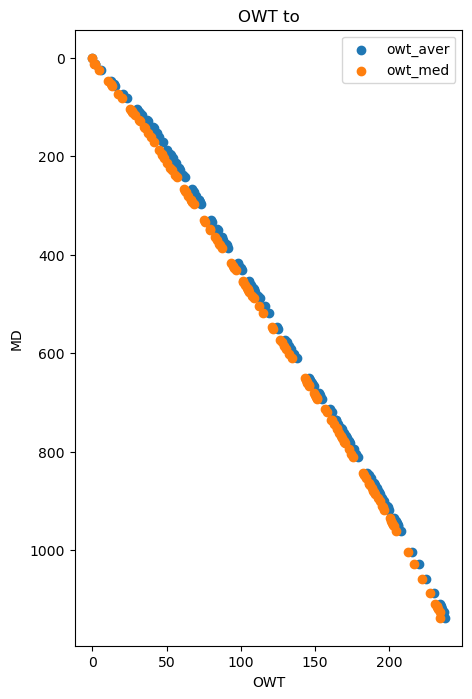

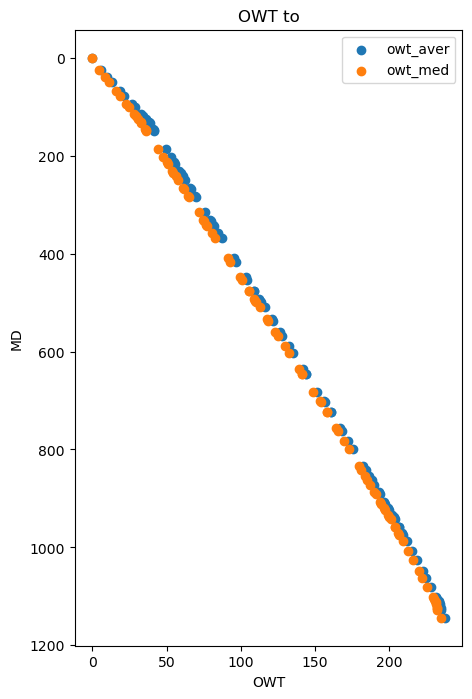

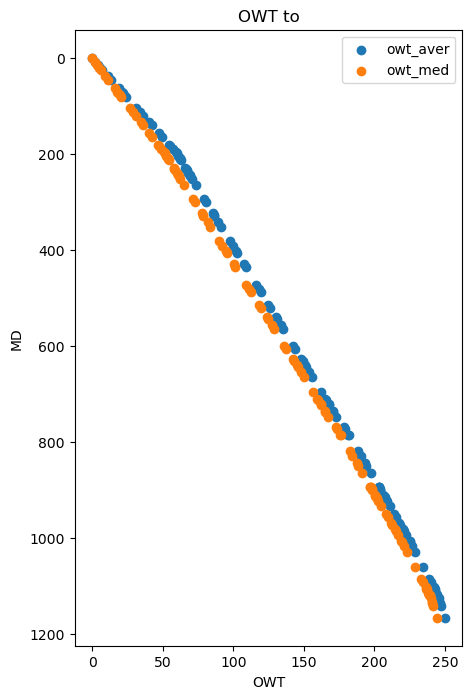

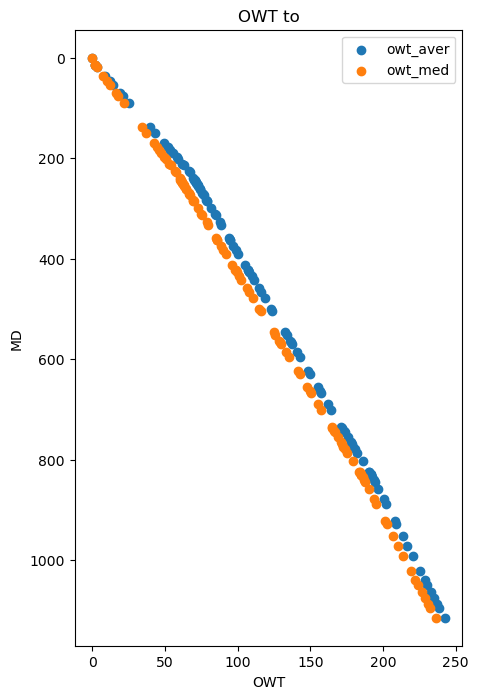

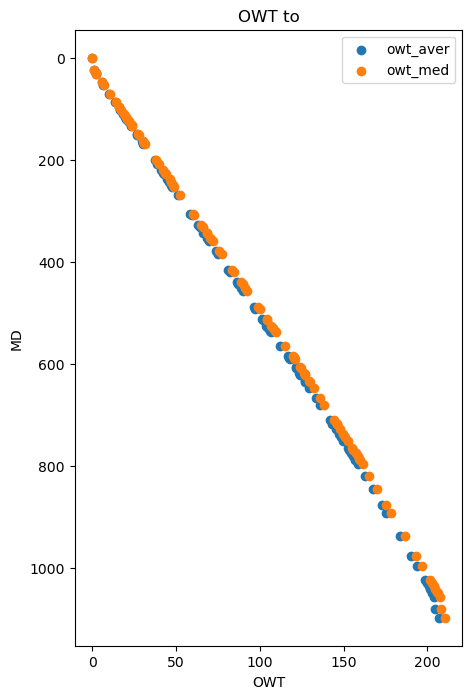

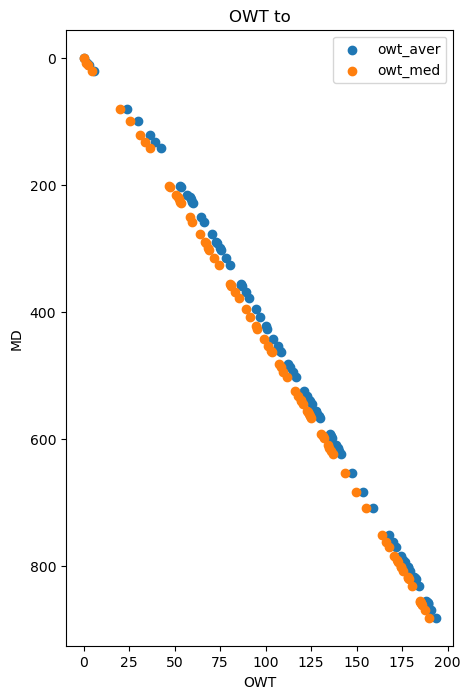

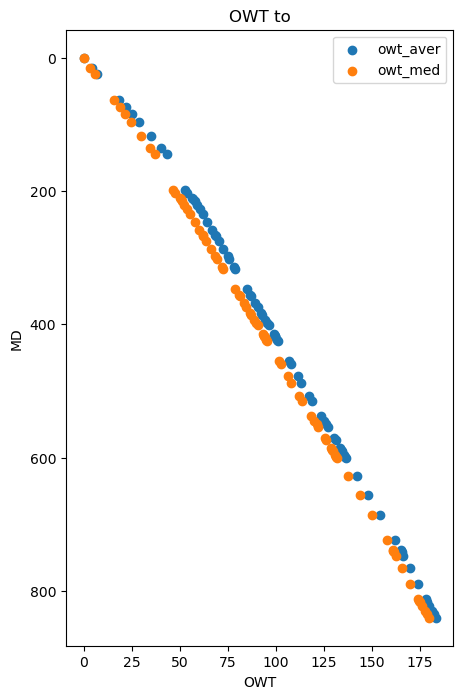

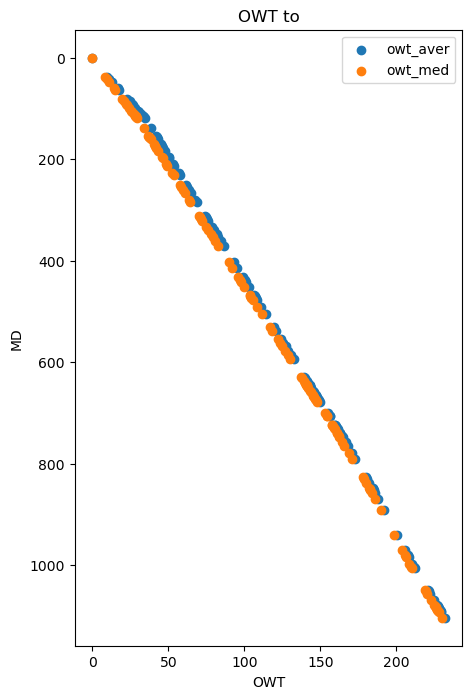

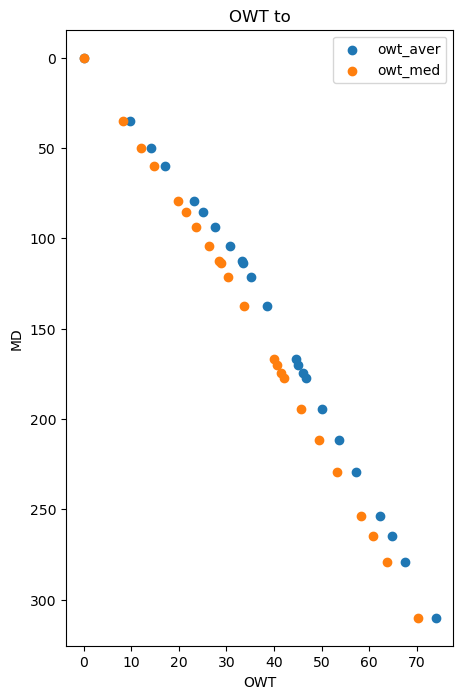

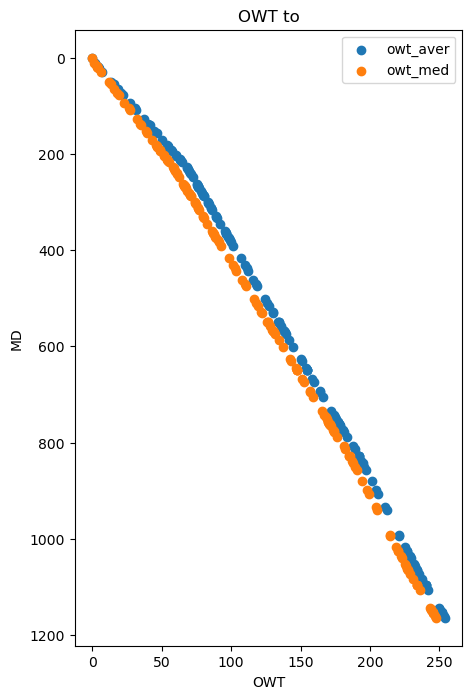

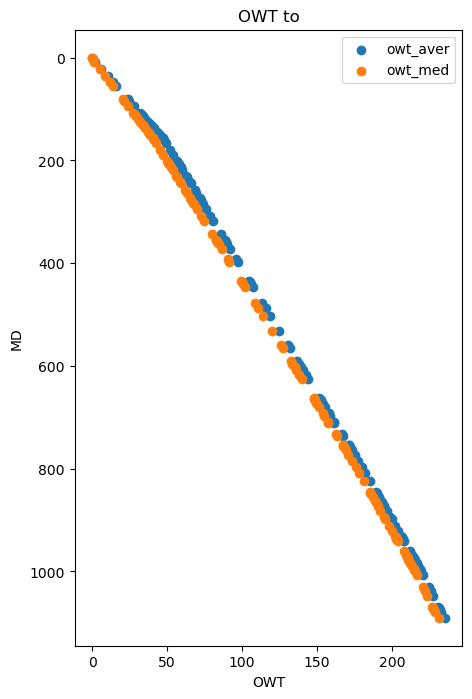

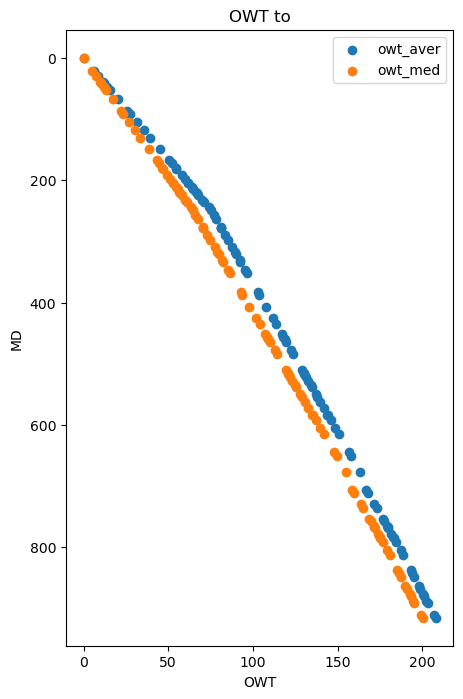

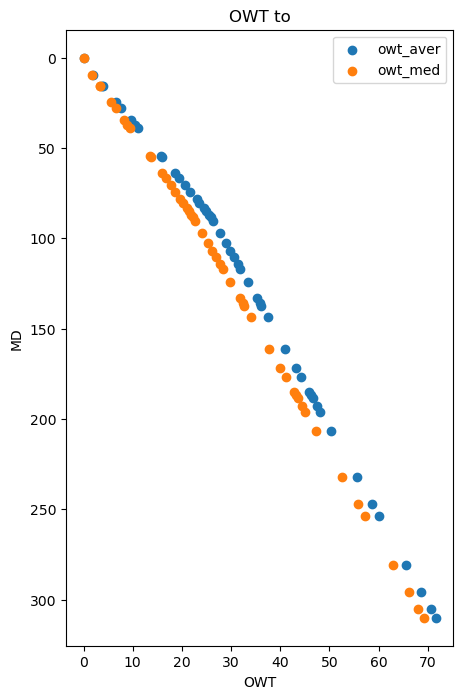

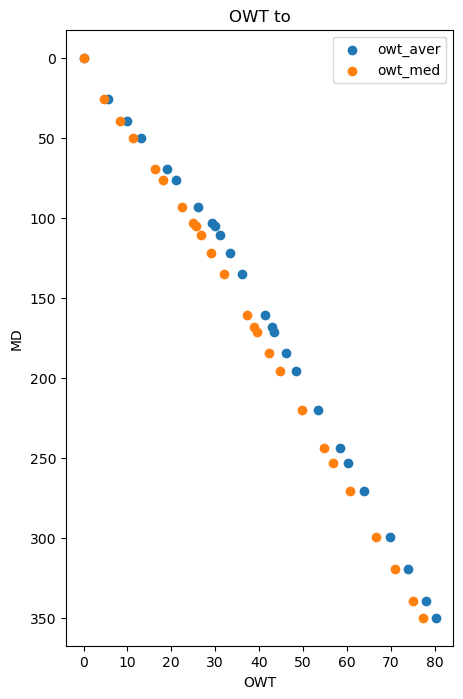

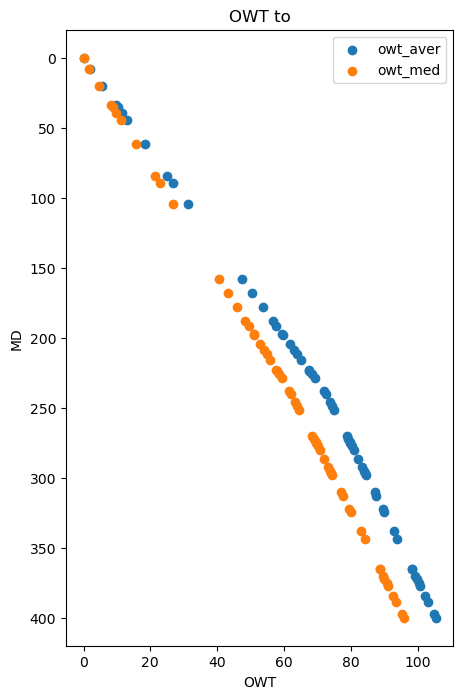

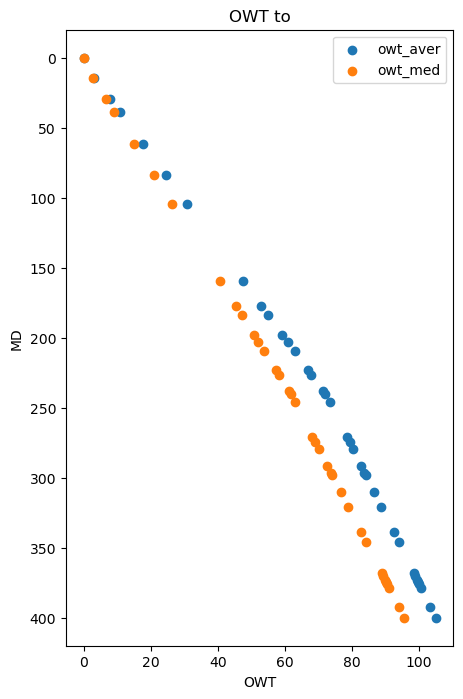

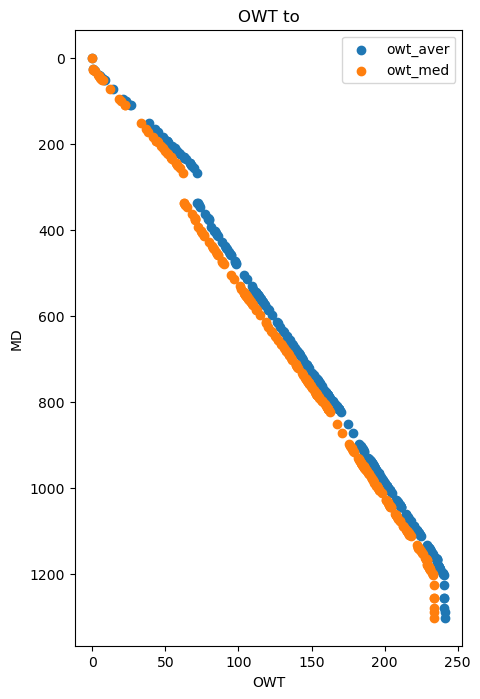

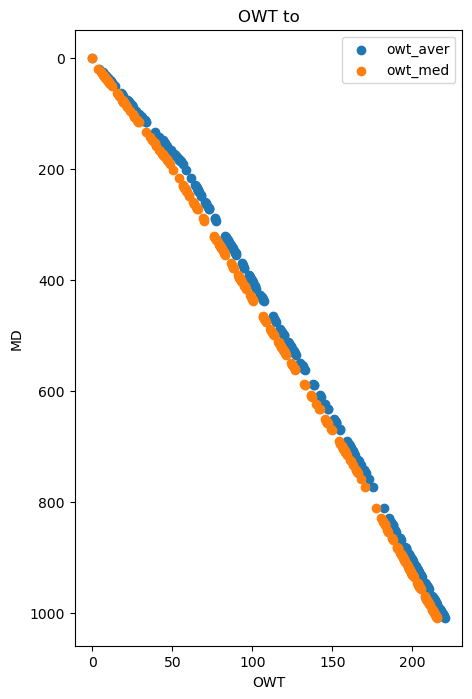

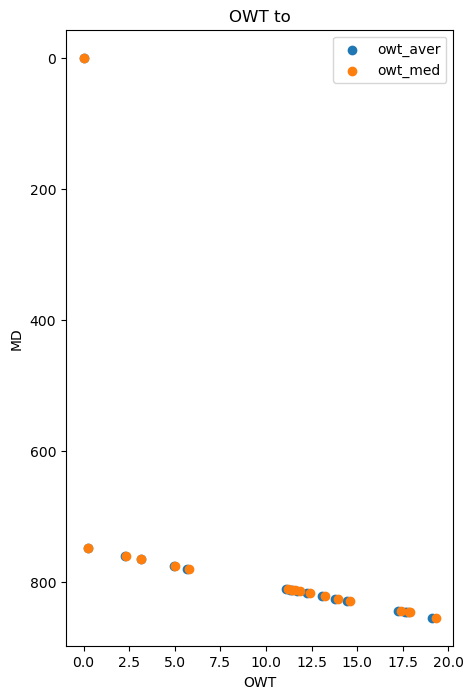

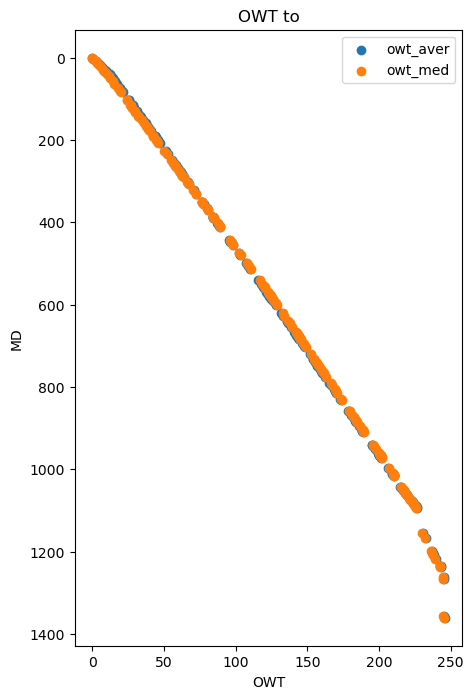

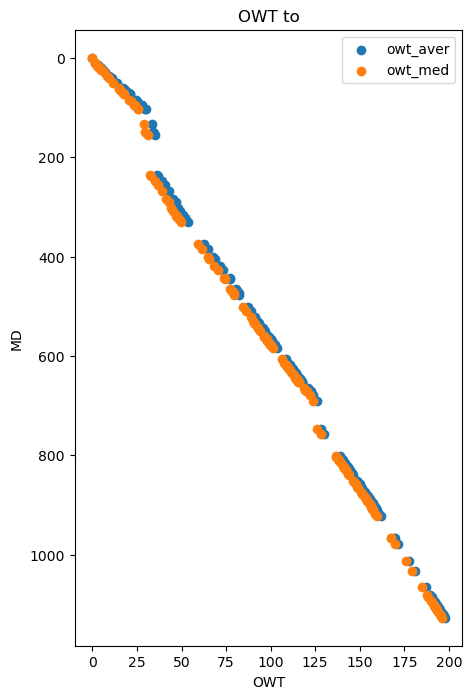

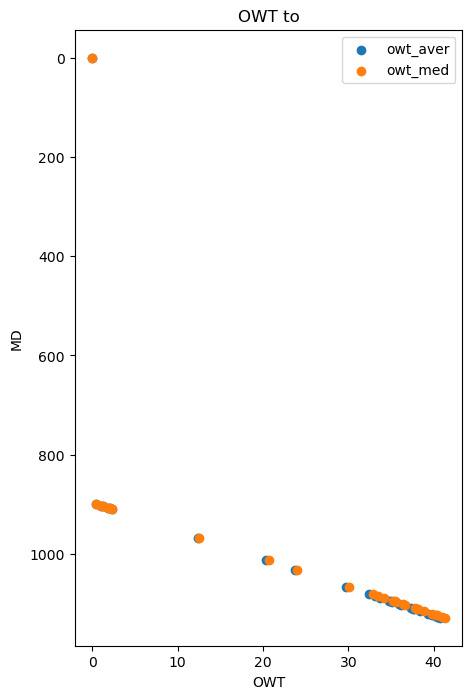

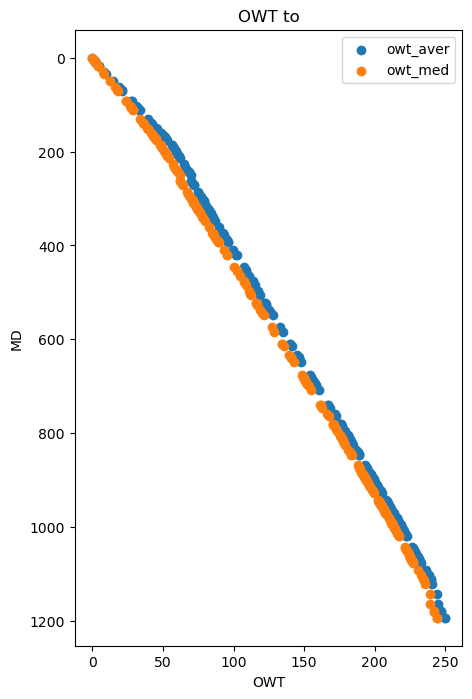

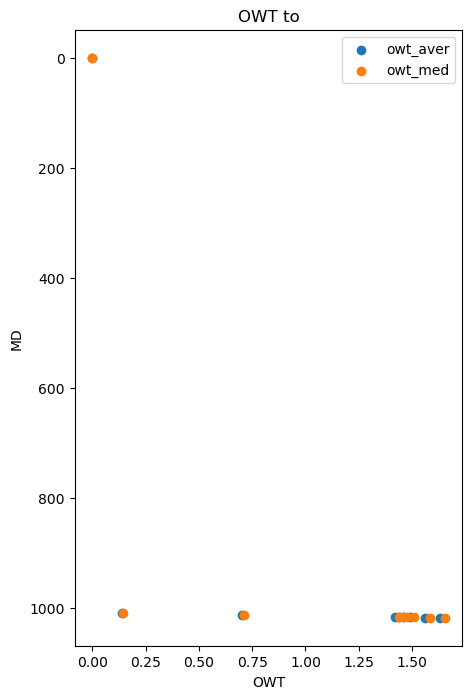

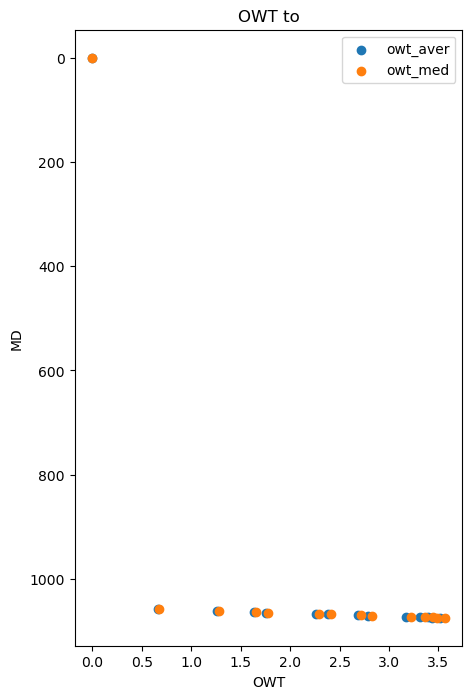

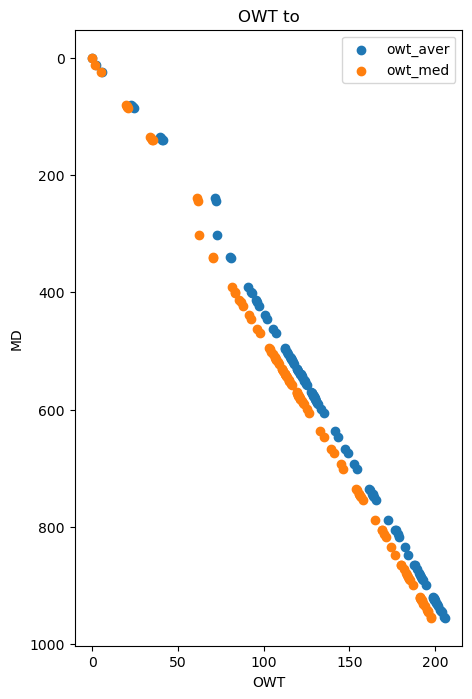

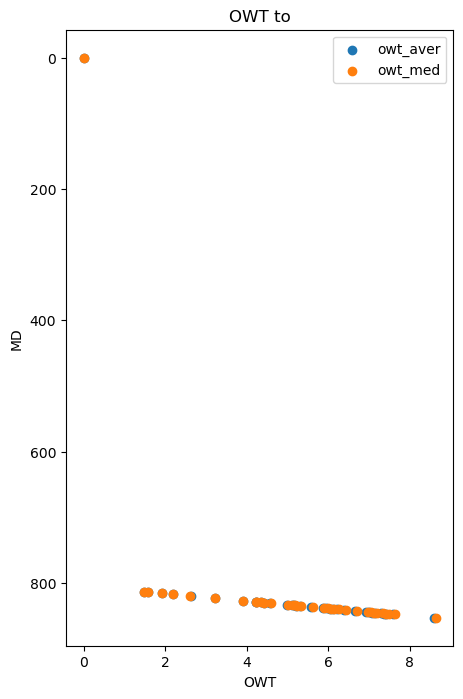

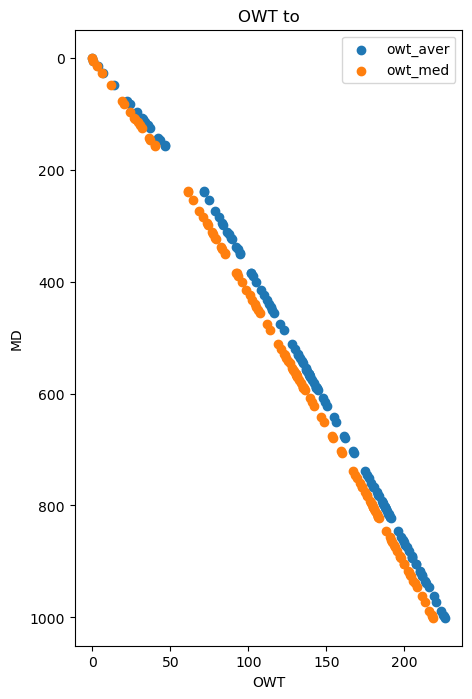

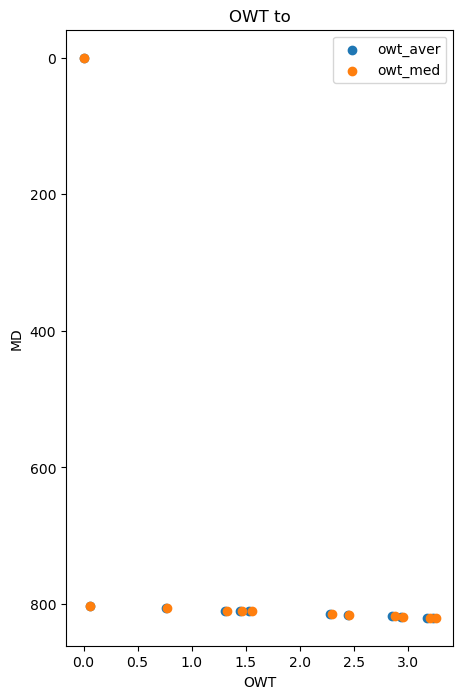

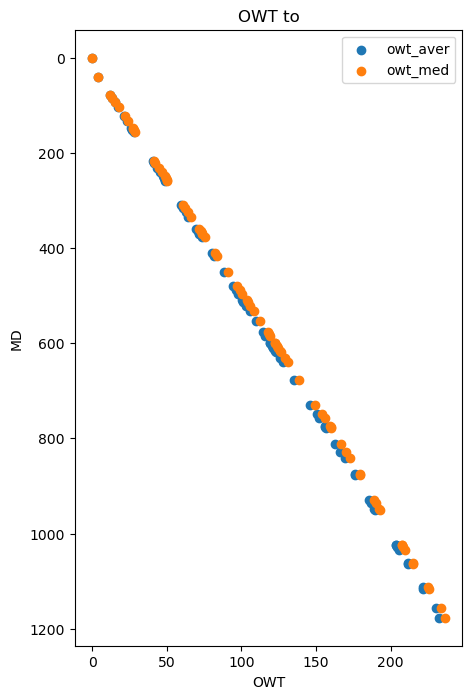

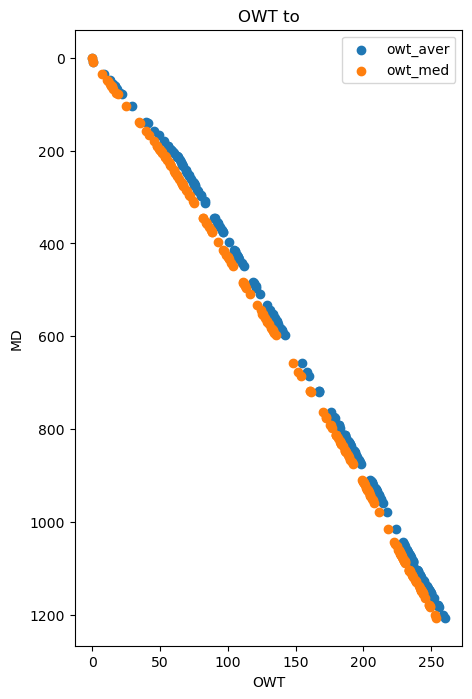

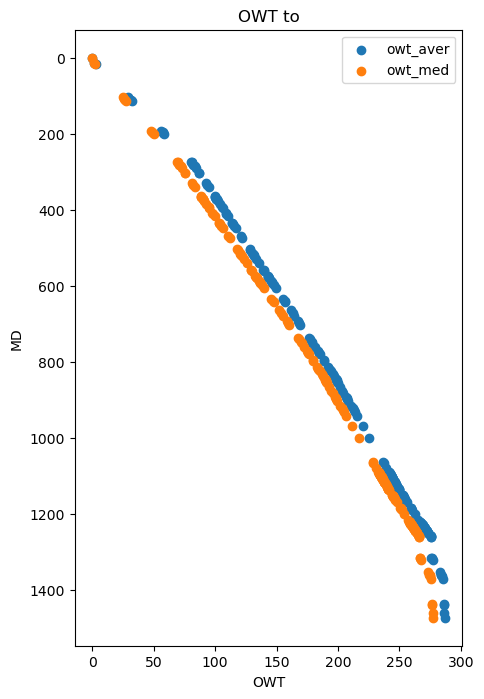

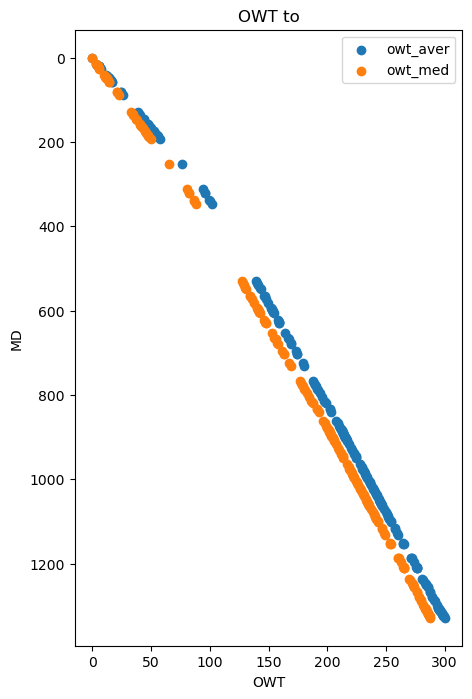

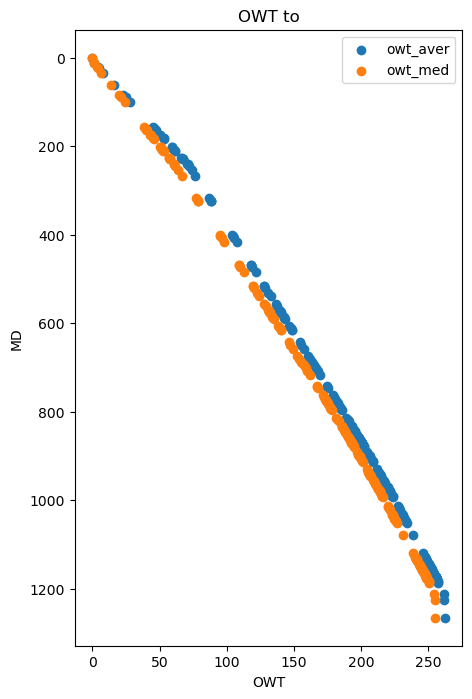

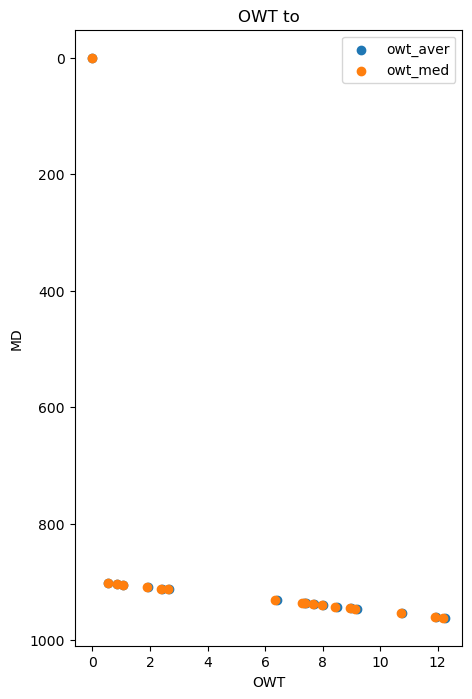

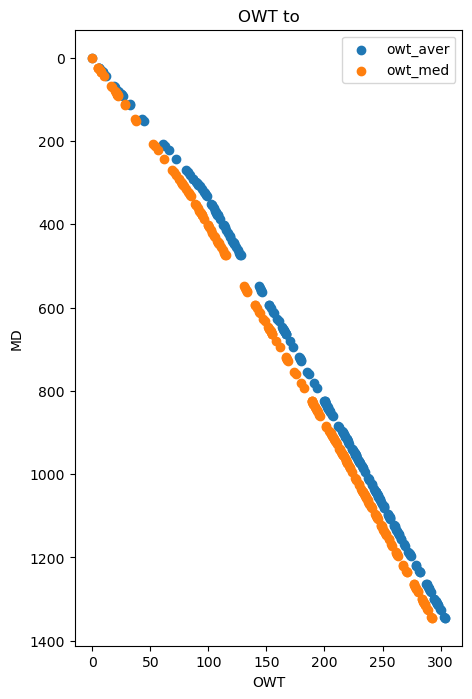

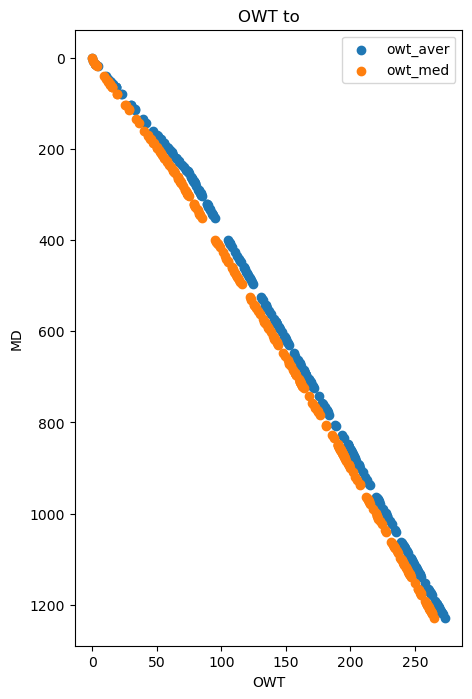

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv(r"C:\Users\Alina\Desktop\000 - Материалы от заказчика\2024.01.29 Petrel Template Data\Well Tops.csv", sep=";", encoding = 'cp1251')
vel_df = pd.read_csv(r"C:\Users\Alina\Desktop\040 - Обработка\Псевдочекшоты\velocity.csv", sep=";")

BHIDs = np.unique(df['BHID'])
#df.loc[df['BHID'] == BHIDs[20]]


for bhid in BHIDs:
    
    temp_df = df[df['BHID'] == bhid]
    
    bhid_name = temp_df.iloc[[0]]["BHID_NAME"].values[0]
    merged_df = temp_df.merge(vel_df, left_on='ST_CODE_svit', right_on='ST_CODE_svit')
    merged_df.sort_values(by=['TO'],  inplace=True) 
    
    t_med = (merged_df['TO'] - merged_df['FROM']) * 1000 / merged_df['Vaver']
    t_aver = (merged_df['TO'] - merged_df['FROM']) * 1000 / merged_df['Vmed']
    merged_df['owt_aver'] = t_aver.cumsum()
    merged_df['owt_med'] = t_med.cumsum()

    
    merged_df = pd.concat([pd.DataFrame([[bhid_name, 0, merged_df['Vaver'][1], 0, 0]], columns=['BHID_NAME','TO', 'Vaver', 'owt_aver', 'owt_med']), merged_df]) #добавим 0
    
    merged_df.rename(columns={'TO': 'MD'}, inplace=True) 
    
    fig, ax = plt.subplots(figsize=(5, 8))
    ax.scatter(merged_df['owt_aver'], merged_df['MD'], label='owt_aver')
    ax.scatter(merged_df['owt_med'], merged_df['MD'], label='owt_med')

    ax.set_title('OWT to')
    ax.legend()
    ax.set_xlabel("OWT")
    ax.set_ylabel("MD")
    ax.invert_yaxis()

    plt.savefig(os.path.join(r"C:\Users\Alina\Desktop\graphics", f"{bhid_name}_plot.png"))

   # merged_df.to_csv(os.path.join(r"C:\Users\Alina\Desktop\OWTaver", f"{bhid_name}.csv"), columns=['BHID_NAME','MD', 'Vaver', 'owt_aver'], encoding='utf-8', index=False)
   # merged_df.to_csv(os.path.join(r"C:\Users\Alina\Desktop\OWTmed", f"{bhid_name}.csv"),  columns=['BHID_NAME','MD', 'Vmed', 'owt_med'], encoding='utf-8', index=False)
    
    merged_df.to_csv(os.path.join(r"C:\Users\Alina\Desktop\OWTaver", f"{bhid_name}.txt"), columns=['BHID_NAME', 'MD', 'Vaver', 'owt_aver'], sep='\t', encoding='utf-8', index=False)
    merged_df.to_csv(os.path.join(r"C:\Users\Alina\Desktop\OWTmed", f"{bhid_name}.txt"),  columns=['BHID_NAME', 'MD', 'Vmed', 'owt_med'], sep='\t', encoding='utf-8', index=False)

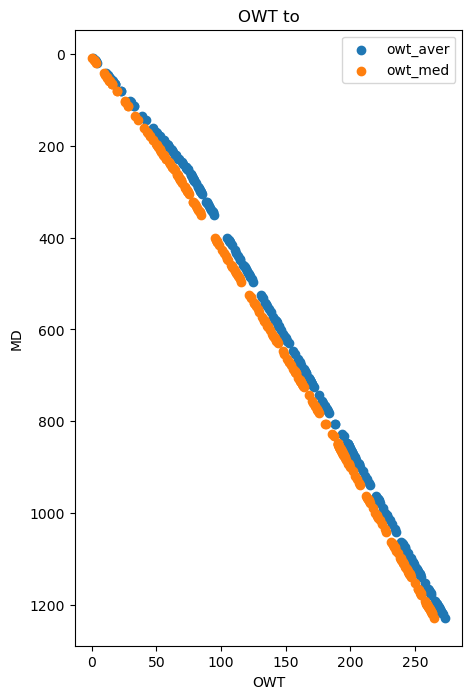

In [127]:
    fig, ax = plt.subplots(figsize=(5, 8))
    ax.scatter(merged_df['owt_aver'], merged_df['TO'], label='owt_aver')
    ax.scatter(merged_df['owt_med'], merged_df['TO'], label='owt_med')

    ax.set_xlabel("OWT")
    ax.set_ylabel("MD")
    ax.set_title('OWT to')
    ax.legend()
    ax.invert_yaxis()

In [170]:
df.iloc[[0]]["BHID_NAME"].values[0]


'747'